In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
def get_pop(state, df2, b):
    listo = list(state_series)
    for x in listo:
        df = df2[df2['state'] == state] 
        a = df[b]
        if df.size == 0:
            return float('nan')
        else:
            return a.squeeze()

In [3]:
data_state = pd.read_excel('data/state.xlsx')
state_series = data_state['state'].squeeze()
data_dem2 = pd.read_excel('data/demog.xlsx')

In [4]:
state = 'US'
data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))
N = np.sum(data_dem)
data_dem2 = pd.read_excel('demog.xlsx')

In [5]:
data_dem

(23533718.75,
 32947206.25,
 18826975,
 127653910.526316,
 63503489.4736842,
 52784300)

In [6]:
0.352*127653910.526316

44934176.50526323

In [7]:
N017=data_dem[0]+data_dem[1]+data_dem[2]
N1849 = data_dem[3]
N64=data_dem[4]
N65 = data_dem[5]

In [8]:
N017

75307900.0

In [9]:
N1849

127653910.526316

In [10]:
N64

63503489.4736842

In [11]:
N65

52784300

In [12]:
#LOAD VACC DATA
y = state

vac1 = pd.read_csv('Script/vacc_base.csv')

vac2 = pd.read_csv('Script/vacc_target.csv')

In [13]:
pop = data_dem

#actual 2022-2023 flu vaccine
vacc_1 = np.zeros([6, 600])
vacc_1[0,0:301] = vac1['0_4'].to_numpy()
vacc_1[1,0:301] = vac1['5_12'].to_numpy()
vacc_1[2,0:301] = vac1['13_17'].to_numpy()
vacc_1[3,0:301] = vac1['18_49'].to_numpy()
vacc_1[4,0:301] = vac1['50_64'].to_numpy()
vacc_1[5,0:301] = vac1['65+'].to_numpy()

#70% CDC target
vacc_2 = np.zeros([6, 600])
vacc_2[0,0:301] = vac2['0_4'].to_numpy()
vacc_2[1,0:301] = vac2['5_12'].to_numpy()
vacc_2[2,0:301] = vac2['13_17'].to_numpy()
vacc_2[3,0:301] = vac2['18_49'].to_numpy()
vacc_2[4,0:301] = vac2['50_64'].to_numpy()
vacc_2[5,0:301] = vac2['65+'].to_numpy()

# no vaccine
vacc_3 = np.zeros([6, 600])

In [14]:
sum(sum(vacc_1[:,0:54]))/sum(sum(vacc_1[:,:]))

0.21723476999015137

In [15]:
'''
v017 = sum(vac1['0_4'][55:270])+sum(vac1['5_12'][55:270])+sum(vac1['13_17'][55:270])
print(v017)
print(v1849)
print(v5064)
print(v65)
print(v017+v1849+v5064+v65)
'''

"\nv017 = sum(vac1['0_4'][55:270])+sum(vac1['5_12'][55:270])+sum(vac1['13_17'][55:270])\nprint(v017)\nprint(v1849)\nprint(v5064)\nprint(v65)\nprint(v017+v1849+v5064+v65)\n"

In [16]:
v1849 = sum(vac1['18_49'][55:270])
v1849

36038180.078221105

In [17]:
v5064 = sum(vac1['50_64'][55:270])

In [18]:
v65 = sum(vac1['65+'][55:270])

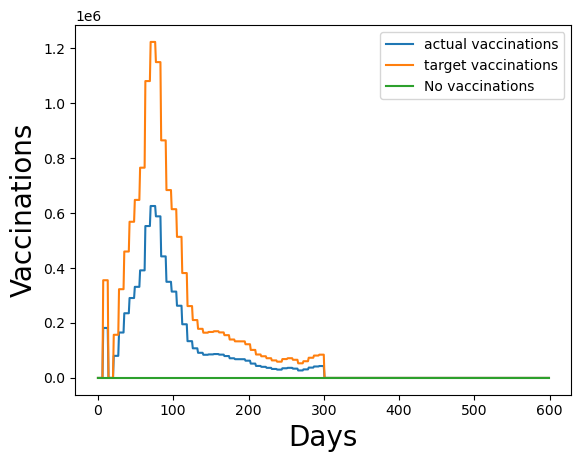

In [19]:
import matplotlib.pyplot as plt

plt.plot(vacc_1[3,:], label='actual vaccinations')
plt.plot(vacc_2[3,:], label='target vaccinations')
plt.plot(vacc_3[3,:],label='No vaccinations')

# set the plot title, x-label, y-label, and legend
#plt.title('65+ vaccination scenario')
plt.xlabel('Days',fontsize=20)
plt.ylabel('Vaccinations', fontsize=20)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
# show the plot
plt.show()

In [20]:
def cum_to_active(Ic):
    Iac = np.zeros([len(Ic), ])
    for i in range(len(Ic)-1):
        Iac[i] = Ic[i+1] - Ic[i]
        
    Iac[len(Ic)-1] = Iac[len(Ic)-2]
    return Iac

In [21]:
def computerate(i, CWW, aW, I, Ni):
    rate = 0
    for n in range(6):
        rate += aW*CWW[i,n]*(np.sum(max(0, I[n]))/Ni[n])
        #return 1
    return rate

I = np.ones([6, ])

In [22]:
hosp_data = np.genfromtxt('files/hosp2.csv', delimiter=';')

In [23]:
US2 = pd.read_csv('fit_data/' + y + '.csv')
US3 = pd.read_csv('fit_data/' + y + '2.csv')

In [24]:
hosps = US2['hosp'].to_numpy() # we have 213 enteries so 213-7 = 206. #till March 08, 2023 
print(len(hosps))

hosp_avg = np.zeros([206, ])
for i in range(206):
    hosp_avg[i] = np.mean(hosps[i:i+7])
    

213


In [25]:
hosps2 = US3['hosp'].to_numpy() # we have 213 enteries so 213-7 = 206. #till March 08, 2023 
print(len(hosps2))

hosp_avg2 = np.zeros([263, ])
for i in range(263):
    hosp_avg2[i] = np.mean(hosps2[i:i+7])

270


In [26]:

CM_all = np.genfromtxt('files/CMs/CM_All.txt')
CM_s = np.genfromtxt('files/CMs/CM_s.txt')
CM_w = np.genfromtxt('files/CMs/CM_w.txt')

In [27]:
cal = pd.read_csv('data/calend_new.csv')
school = cal['school'].to_numpy()
work = cal['work'].to_numpy()

In [28]:
vacc_cov = pd.read_csv('cumulative_dose.csv') # This csv file is same as the cumulative_dose_new.csv file in script folder generated using code in vaxx_new.ipynb

In [29]:
Seed = np.zeros([500, 1])

In [30]:
def get_sero(state, df2, age):
    df = df2[df2['state'] == state]
    a = df[age]
    if df.size == 0:
        return float('nan')
    else:
        return a.squeeze()

In [31]:
def set_imm(val):  #ask significance of this # mostly immunity value related
    for i in range(1000):
        fac = 2 + i*0.01
        MM_0 = [fac*0.13, fac*0.04,fac*0.04, fac*0.054, fac*0.13, fac*0.316]
        xx = np.sum(np.array(data_dem)*np.array(MM_0))/N
        if (xx >=  val):
            break
    return MM_0

In [32]:
facc = 0.144
IHR = [facc*0.25, facc*0.06,facc*0.017, facc*0.025, facc*0.07, facc*0.45]
IRec = [1- facc*0.25, 1- facc*0.06, 1-facc*0.017, 1-facc*0.025, 1-facc*0.07, 1-facc*0.45]

np.sum(np.array(data_dem)*np.array(IHR))/N

0.01784828567863349

In [33]:
faccc = 0.635
HDR = [faccc*0.13, faccc*0.04,faccc*0.04, faccc*0.054, faccc*0.13, faccc*0.316]
HDRec = [1- faccc*0.13, 1- faccc*0.04, 1-faccc*0.04, 1-faccc*0.054, 1-faccc*0.13, 1-faccc*0.316]

np.sum(np.array(data_dem)*np.array(HDR))/N

0.07351281245947526

In [34]:
fac2 = sum(sum(vacc_1[:,0:54]))/sum(sum(vacc_1[:,:]))

M2_0 = [0.01*get_sero(state, vacc_cov, '0_4')*fac2, 0.01*get_sero(state, vacc_cov, '5_12')*fac2, 0.01*get_sero(state, vacc_cov, '13_17')*fac2, 0.01*get_sero(state, vacc_cov, '18_49')*fac2, 0.01*get_sero(state, vacc_cov, '50_64')*fac2, 0.01*get_sero(state, vacc_cov, '65+')*fac2]
np.sum(np.array(data_dem)*np.array(M2_0))/N
#M2_0

0.0998071455753555

In [35]:
g_E = 1/(2)
g_hosp = 1/6
q = 2/3
Ni = data_dem

g_Recovery = 1/4
g_em = 1/12
g_inf = 1/10
KM = 100

g_hosp = 1/5

In [36]:
flu_age = pd.read_csv('FluSurveillance_Custom_Download_Data.csv', usecols = ['MMWR-YEAR','MMWR-WEEK','AGE CATEGORY','CUMULATIVE RATE','WEEKLY RATE '])
flu_age_04=flu_age[flu_age['AGE CATEGORY'] == '0-4 yr']
flu_age_511=flu_age[flu_age['AGE CATEGORY'] == '5-11  yr']
flu_age_1217=flu_age[flu_age['AGE CATEGORY'] == '12-17 yr']
flu_age_1849=flu_age[flu_age['AGE CATEGORY'] == '18-49 yr']
flu_age_5064=flu_age[flu_age['AGE CATEGORY'] == '50-64 yr']
flu_age_65=flu_age[flu_age['AGE CATEGORY'] == '65+ yr']

flu_age_04_array=flu_age_04['CUMULATIVE RATE'].to_numpy()
flu_age_511_array=flu_age_511['CUMULATIVE RATE'].to_numpy()
flu_age_1217_array=flu_age_1217['CUMULATIVE RATE'].to_numpy()
flu_age_1849_array=flu_age_1849['CUMULATIVE RATE'].to_numpy()
flu_age_5064_array=flu_age_5064['CUMULATIVE RATE'].to_numpy()
flu_age_65_array=flu_age_65['CUMULATIVE RATE'].to_numpy()

In [42]:
Hum_fit = pd.read_csv('abs_hum_fit.csv')
Hum_365=Hum_fit['humidity'].to_numpy()

In [43]:
from statistics import mean 
def cal_hum(length, start_date, magnitude):
    hum_final=np.zeros([length, 1])
    for i in range(len(hum_final)):
        j=(i+start_date)%365
        hum_final[i]=1+((mean(Hum_365)-Hum_365[j])/(max(Hum_365)-mean(Hum_365)))*magnitude

    return hum_final

In [44]:
vacc_1=vacc_1[:,54:]
vacc_2=vacc_2[:,54:]
vacc_3=vacc_3[:,54:]
hosp_avg2=hosp_avg2[54:]
school=school[54:]
work=work[54:]

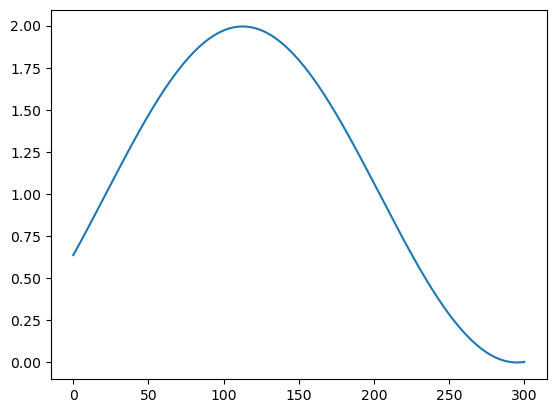

In [45]:
cc=cal_hum(365, 0, 1)
zz2=cal_hum(301, 273, 1)
plt.plot(zz2)

In [155]:
def sim_hospA(x, x0, x1, x2, x3,mag,ratio1,ratio2,ratio3):
    sc1 = "normal"
    sc2 = "baseline"
    Nd = 216  # earlier it was 102 as 102 enteries in fitdata set, now we have 213 eneteries
    dt = 1 #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    I = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    
    S1 = np.zeros([6])
    E1 = np.zeros([6, ])
    I1 = np.zeros([6, ])
    H1 = np.zeros([6, ])
    R1 = np.zeros([6, ])
    M3_0 = set_imm(0.33)    
    D = np.zeros([6, ])
    M = np.array(M3_0)
    M1 = np.zeros([6, ])
    Mv = np.array(M_0)
  
    sigma = 0.000

    def dW(delta_t):
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S1_new = np.zeros([6, ])
    E1_new = np.zeros([6, ])
    I1_new = np.zeros([6, ])
    H1_new = np.zeros([6, ])
    R1_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    I_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])

    D_age = np.zeros([6, ])
    
    M_new = np.array(M3_0)
    M1_new = np.zeros([6, ])
    Mv_new = np.zeros([6, ])
        
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    M1_ov = np.zeros([Nd, 6])
    Mv_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M1_ovv = np.zeros([Nd, 6])
    Mv_ovv = np.zeros([Nd, ])
    Mv_ovv19 = np.zeros([Nd, 6])
    prot = np.zeros([Nd, 6])
    
    bita_s = np.zeros([Nd, ])    
    count = 0

    
    
    E0 = [ratio1*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio3*x2]
    I_0 = [ratio1*x1,ratio2*x1,ratio2*x1,ratio2*x1,ratio2*x1,ratio3*x1]
    H0 = [ratio1*x3,ratio2*x3,ratio2*x3,ratio2*x3,ratio2*x3,ratio3*x3]
    
    w2 = np.log(2)/(18*60)
    w1 = np.log(2)/(3*60)
    ww = 1/(10)
    
    D0 = [0/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - I_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    I = np.asarray(I_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M3_0)
    if (sc2 == "baseline"):
        Mv = np.asarray(M2_0)
    if (sc2 == "none"):
        Mv = np.zeros([6, ])
    for tt in range(int(Nd/dt)):
        zx = 1
        
        bita = (mag*(zz2[count]-1)+1)*(x0/N)              
        CM = CM_all
        if (school[count] == 0):
            CM = CM - CM_s

        if (work[count] == 0):
            CM = CM - CM_w - CM_s
                
        for i in range(6):      
            S_g  =  g(S[i],sigma)*dW(dt)
            E_g  =  g(E[i],sigma)*dW(dt)
            I_g  =  g(I[i],sigma)*dW(dt)
            H_g = g(H[i],sigma)*dW(dt)              
            R_g = g(R[i],sigma)*dW(dt)  

            S1_g  =  g(S1[i],sigma)*dW(dt)
            E1_g  =  g(E1[i],sigma)*dW(dt)
            I1_g  =  g(I1[i],sigma)*dW(dt)
            H1_g = g(H1[i],sigma)*dW(dt)              
            R1_g = g(R1[i],sigma)*dW(dt) 

        
        
        K_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        K1_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        Kh_o = [4, 4, 4, 0.5, 0.5, 0.5]# natural imm against flu hosp
        K1h_o = [4, 4, 4, 0.5, 0.5, 0.5] # natural imm against flu hosp
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
            Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        '''
        '''
        ####our metanalysis proposal 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.5385, 0.5385, 0.3158]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.2346,0.2346,0.04]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.5385, 0.5385, 0.3158]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.2346,0.2346,0.04]# vacc eff against flu hosp
        '''   
        ###rebecca A:
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.3154, 0.3154, 0.3154, 0.25, 0.25, 0.1765]#vacc eff against flu infection
            Kvh_o = [1.381, 1.381, 1.381, 0.5156,0.5156,0.1628]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.3154, 0.3154, 0.3154, 0.25, 0.25, 0.1765]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.381, 1.381, 1.381, 0.5156,0.5156,0.1628]# vacc eff against flu hosp
        '''
        
        ###rebecca B:
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.4493, 0.4493, 0.4493, 0.4493, 0.4493, 0.4493]#vacc eff against flu infection
            Kvh_o = [1.127, 1.127, 1.127, 0.2987,0.2987,0]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.4493, 0.4493, 0.4493, 0.4493, 0.4493, 0.4493]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.127, 1.127, 1.127, 0.2987,0.2987,0]# vacc eff against flu hosp
        '''
        '''
        #### sensitivity analysis
        ## low scenario 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.3889, 0.3889, 0.3889, 0.1628, 0.1628, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.2346,0.2346,0.1111]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.3889,0.3889, 0.3889, 0.1628, 0.1628, 0]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.2346,0.2346,0.1111]# vacc eff against flu hosp
        
        '''
        '''
        ###high scenario 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [1.2222, 1.2222, 1.2222, 1.0408, 1.0408, 0.1818]#vacc eff against flu infection
            Kvh_o = [1.3809, 1.3809, 1.3809, 0.2195,0.2195,0]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [1.2222, 1.2222, 1.2222, 1.0408, 1.0408, 0.1818]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.3809, 1.3809, 1.3809, 0.2195,0.2195,0]# vacc eff against flu hosp
        '''
        
        ### NEW VE (METABIN AND VISION)
        
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.4925, 0.4925, 0.4925, 0.06, 0.06, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.04,0.04,0.4925]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.4925, 0.4925, 0.4925, 0.06, 0.06, 0]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.04,0.04,0.4925]# vacc eff against flu hosp


        for i in range(6):   
                
            prot_inf = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_inf1 = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_hosp = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            prot_hosp1 = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            #if (sc2 == "pesImm"):
            #    prot_inf1 = (1-0.5)*K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            #else:
             #   prot_inf1 = (1-0)*K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]

            S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, I, Ni)*S[i] - (bita/(1 + prot_inf1))*computerate(i, CM, 1, I1, Ni)*S[i] + ww*R[i] + ww*R1[i]) + S_g
            E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, I , Ni)*S[i] - g_E*E[i])  + E_g
                
            case_c_new[i] = case_c[i] + dt*(g_E*E[i] + g_E*E1[i])      
            I_new[i] = I[i] + dt*(g_E*E[i]  - g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i] - g_Recovery*IRec[i]*I[i]) + I_g
            hosp_c_new[i] = hosp_c[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i] + g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i])
                
            H_new[i] = H[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp))*H[i] - g_hosp*HDRec[i]*H[i]) + H_g    
            D_new[i] = D[i] + dt*(zx*HDR[i]*g_hosp/(1 + prot_hosp)*H[i] + zx*HDR[i]*g_hosp/(1 + prot_hosp1)*H1[i]) 
            R_new[i] = R[i] + dt*( g_hosp*HDRec[i]*H[i] + g_Recovery*IRec[i]*I[i] - ww*R[i]) + R_g
                
            E1_new[i] = E1[i] + dt*((bita/(1 + prot_inf1))*computerate(i, CM, 1, I1, Ni)*S[i] - g_E*E1[i])  + E1_g
            I1_new[i] = I1[i] + dt*(Seed[tt]*(data_dem[i]/N) + g_E*E1[i]  - g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i] - g_Recovery*IRec[i]*I1[i]) + I1_g
            # change seed to 0 will have no difference in pes and opt scenarios 
            #I1_new[i] = I1[i] + dt*(0*(data_dem[i]/N) + g_E*E1[i]  - g_Recovery*(IHR[i]/(1 + prot_inf1))*I1[i] - g_Recovery*IRec[i]*I1[i]) + I1_g

            H1_new[i] = H1[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp1))*H1[i] - g_hosp*HDRec[i]*H1[i]) + H1_g    
            R1_new[i] = R1[i] + dt*( g_hosp*HDRec[i]*H1[i] + g_Recovery*IRec[i]*I1[i] - ww*R1[i]) + R1_g
                 #hosp_c[i] = H_new[i] + H1_new[i]
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
                     
                
            if (count <= 480):
                if (sc2 == "baseline"):   
                    vacc_ref = vacc_1
                if (sc2 == "target"):   
                    vacc_ref = vacc_2
                if (sc2 == "none"):   
                    vacc_ref = vacc_3
                Mv_new[i] = Mv[i] + dt*(- w1*Mv[i] + k1*vacc_ref[i, count])
                M1_new[i] = M1[i] + dt*(-w2*M1[i] + k3*R1[i]/(prot_inf1))
                M_new[i] = M[i] + dt*(-w2*M[i] + k3*R[i]/(prot_inf))
                prot[count,i] = (1/(1+prot_inf))
                            
                            
        S = S_new; E = E_new; I = I_new; case_c = case_c_new; hosp_c = hosp_c_new; H = H_new; D = D_new; R = R_new; M = M_new; M1 = M1_new; Mv = Mv_new;
        S1 = S1_new; E1 = E1_new; I1 = I1_new; H1 = H1_new; R1 = R1_new; 
        if(tt % int(1/dt) == 0):
            #bita_s[count] = np.sum(np.array(K1_b)*np.array(M22)) + np.sum(np.array(K1_v)*np.array(M)) + np.sum(np.array(K1_o12)*np.array(MX))
           
            for i in range(6):
                Mv_ovv19[count, i] = Mv[i]
                #prot[count,i] = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
               
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            
            #symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M1_ovv[count] = np.sum(np.array(data_dem)*np.array(M1))/N
            Mv_ovv[count] = np.sum(np.array(data_dem)*np.array(Mv))/N

            
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(I + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = max(np.mean(D2_ova[i:i+7]), 0)
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
    return H_ov_avg

In [156]:
def simulation_st1(x):
    Nd = 216# earlier it was 357 here, now I am taking 301 
    dt = 1 #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    I = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    
    S1 = np.zeros([6])
    E1 = np.zeros([6, ])
    I1 = np.zeros([6, ])
    H1 = np.zeros([6, ])
    R1 = np.zeros([6, ])
    M3_0 = set_imm(0.33)    
    D = np.zeros([6, ])
    M = np.array(M3_0)
    M1 = np.zeros([6, ])
    Mv = np.array(M_0)
  
    sigma = 0.000

    def dW(delta_t):
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S1_new = np.zeros([6, ])
    E1_new = np.zeros([6, ])
    I1_new = np.zeros([6, ])
    H1_new = np.zeros([6, ])
    R1_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    I_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])

    D_age = np.zeros([6, ])
    
    M_new = np.array(M3_0)
    M1_new = np.zeros([6, ])
    Mv_new = np.zeros([6, ])
        
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    hosp_cc1 = np.zeros([Nd, ])
    hosp_cc2 = np.zeros([Nd, ])
    hosp_cc3 = np.zeros([Nd, ])
    hosp_cc4 = np.zeros([Nd, ])
    hosp_cc5 = np.zeros([Nd, ])
    hosp_cc0 = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    M1_ov = np.zeros([Nd, 6])
    Mv_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M1_ovv = np.zeros([Nd, 6])
    Mv_ovv = np.zeros([Nd, ])
    Mv_ovv19 = np.zeros([Nd, 6])
    prot = np.zeros([Nd, 6])
    
    bita_s = np.zeros([Nd, ])    
    count = 0

    
    
    E0 = [ratio1*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio3*x2]
    I_0 = [ratio1*x1,ratio2*x1,ratio2*x1,ratio2*x1,ratio2*x1,ratio3*x1]
    H0 = [ratio1*x3,ratio2*x3,ratio2*x3,ratio2*x3,ratio2*x3,ratio3*x3]
    
    w2 = np.log(2)/(18*60)
    w1 = np.log(2)/(3*60)
    ww = 1/(10)
    
    D0 = [0/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - I_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    I = np.asarray(I_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M3_0)
    if (sc2 == "baseline"):
        Mv = np.asarray(M2_0)
    if (sc2 == "none"):
        Mv = np.zeros([6, ])
    for tt in range(int(Nd/dt)):
        zx = 1        
        bita = (mag*(zz2[count]-1)+1)*(x0/N)              
        CM = CM_all
        if (school[count] == 0):
            CM = CM - CM_s

        if (work[count] == 0):
            CM = CM - CM_w - CM_s
                
        for i in range(6):      
            S_g  =  g(S[i],sigma)*dW(dt)
            E_g  =  g(E[i],sigma)*dW(dt)
            I_g  =  g(I[i],sigma)*dW(dt)
            H_g = g(H[i],sigma)*dW(dt)              
            R_g = g(R[i],sigma)*dW(dt)  

            S1_g  =  g(S1[i],sigma)*dW(dt)
            E1_g  =  g(E1[i],sigma)*dW(dt)
            I1_g  =  g(I1[i],sigma)*dW(dt)
            H1_g = g(H1[i],sigma)*dW(dt)              
            R1_g = g(R1[i],sigma)*dW(dt) 

        
        
        K_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        K1_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        Kh_o = [4, 4, 4, 0.5, 0.5, 0.5]# natural imm against flu hosp
        K1h_o = [4, 4, 4, 0.5, 0.5, 0.5] # natural imm against flu hosp
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
            Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        '''
        '''
        ####our metanalysis proposal 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.5385, 0.5385, 0.3158]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.2346,0.2346,0.04]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.5385, 0.5385, 0.3158]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.2346,0.2346,0.04]# vacc eff against flu hosp
        '''    
        ###rebecca A:
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.3154, 0.3154, 0.3154, 0.25, 0.25, 0.1765]#vacc eff against flu infection
            Kvh_o = [1.381, 1.381, 1.381, 0.5156,0.5156,0.1628]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.3154, 0.3154, 0.3154, 0.25, 0.25, 0.1765]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.381, 1.381, 1.381, 0.5156,0.5156,0.1628]# vacc eff against flu hosp
        '''
        
        ###rebecca B:
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.4493, 0.4493, 0.4493, 0.4493, 0.4493, 0.4493]#vacc eff against flu infection
            Kvh_o = [1.127, 1.127, 1.127, 0.2987,0.2987,0]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.4493, 0.4493, 0.4493, 0.4493, 0.4493, 0.4493]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.127, 1.127, 1.127, 0.2987,0.2987,0]# vacc eff against flu hosp
        '''
        '''
        #### sensitivity analysis
        ## low scenario 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.3889, 0.3889, 0.3889, 0.1628, 0.1628, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.2346,0.2346,0.1111]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.3889,0.3889, 0.3889, 0.1628, 0.1628, 0]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.2346,0.2346,0.1111]# vacc eff against flu hosp
        
        '''
        '''
        ###high scenario 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [1.2222, 1.2222, 1.2222, 1.0408, 1.0408, 0.1818]#vacc eff against flu infection
            Kvh_o = [1.3809, 1.3809, 1.3809, 0.2195,0.2195,0]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [1.2222, 1.2222, 1.2222, 1.0408, 1.0408, 0.1818]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.3809, 1.3809, 1.3809, 0.2195,0.2195,0]# vacc eff against flu hosp
        '''
        
        ### NEW VE (METABIN AND VISION)
        
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.4925, 0.4925, 0.4925, 0.06, 0.06, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.04,0.04,0.4925]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.4925, 0.4925, 0.4925, 0.06, 0.06, 0]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.04,0.04,0.4925]# vacc eff against flu hosp

        

        for i in range(6):   
                
            prot_inf = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_inf1 = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_hosp = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            prot_hosp1 = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            #if (sc2 == "pesImm"):
            #    prot_inf1 = (1-0.5)*K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            #else:
             #   prot_inf1 = (1-0)*K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]

            S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, I, Ni)*S[i] - (bita/(1 + prot_inf1))*computerate(i, CM, 1, I1, Ni)*S[i] + ww*R[i] + ww*R1[i]) + S_g
            E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, I , Ni)*S[i] - g_E*E[i])  + E_g
                
            case_c_new[i] = case_c[i] + dt*(g_E*E[i] + g_E*E1[i])      
            I_new[i] = I[i] + dt*(g_E*E[i]  - g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i] - g_Recovery*IRec[i]*I[i]) + I_g
            hosp_c_new[i] = hosp_c[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i] + g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i])
                
            H_new[i] = H[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp))*H[i] - g_hosp*HDRec[i]*H[i]) + H_g    
            D_new[i] = D[i] + dt*(zx*HDR[i]*g_hosp/(1 + prot_hosp)*H[i] + zx*HDR[i]*g_hosp/(1 + prot_hosp1)*H1[i]) 
            R_new[i] = R[i] + dt*( g_hosp*HDRec[i]*H[i] + g_Recovery*IRec[i]*I[i] - ww*R[i]) + R_g
                
            E1_new[i] = E1[i] + dt*((bita/(1 + prot_inf1))*computerate(i, CM, 1, I1, Ni)*S[i] - g_E*E1[i])  + E1_g
            I1_new[i] = I1[i] + dt*(Seed[tt]*(data_dem[i]/N) + g_E*E1[i]  - g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i] - g_Recovery*IRec[i]*I1[i]) + I1_g
            # change seed to 0 will have no difference in pes and opt scenarios 
            #I1_new[i] = I1[i] + dt*(0*(data_dem[i]/N) + g_E*E1[i]  - g_Recovery*(IHR[i]/(1 + prot_inf1))*I1[i] - g_Recovery*IRec[i]*I1[i]) + I1_g

            H1_new[i] = H1[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp1))*H1[i] - g_hosp*HDRec[i]*H1[i]) + H1_g    
            R1_new[i] = R1[i] + dt*( g_hosp*HDRec[i]*H1[i] + g_Recovery*IRec[i]*I1[i] - ww*R1[i]) + R1_g
                 #hosp_c[i] = H_new[i] + H1_new[i]
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
                     
                
            if (count <= 480):
                if (sc2 == "baseline"):   
                    vacc_ref = vacc_1
                if (sc2 == "target"):   
                    vacc_ref = vacc_2
                if (sc2 == "none"):   
                    vacc_ref = vacc_3
                Mv_new[i] = Mv[i] + dt*(- w1*Mv[i] + k1*vacc_ref[i, count])
                M1_new[i] = M1[i] + dt*(-w2*M1[i] + k3*R1[i]/(prot_inf1))
                M_new[i] = M[i] + dt*(-w2*M[i] + k3*R[i]/(prot_inf))
                prot[count,i] = (1/(1+prot_inf))
                            
                            
        S = S_new; E = E_new; I = I_new; case_c = case_c_new; hosp_c = hosp_c_new; H = H_new; D = D_new; R = R_new; M = M_new; M1 = M1_new; Mv = Mv_new;
        S1 = S1_new; E1 = E1_new; I1 = I1_new; H1 = H1_new; R1 = R1_new; 
        if(tt % int(1/dt) == 0):
            #bita_s[count] = np.sum(np.array(K1_b)*np.array(M22)) + np.sum(np.array(K1_v)*np.array(M)) + np.sum(np.array(K1_o12)*np.array(MX))
           
            for i in range(6):
                Mv_ovv19[count, i] = Mv[i]
                #prot[count,i] = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
               
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            hosp_cc0[count] = hosp_c[0]
            hosp_cc1[count] = hosp_c[1]
            hosp_cc2[count] = hosp_c[2]
            hosp_cc3[count] = hosp_c[3]
            hosp_cc4[count] = hosp_c[4]
            hosp_cc5[count] = hosp_c[5]
            
            #symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M1_ovv[count] = np.sum(np.array(data_dem)*np.array(M1))/N
            Mv_ovv[count] = np.sum(np.array(data_dem)*np.array(Mv))/N

            
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(I + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    H_ova0 = cum_to_active(hosp_cc0)
    H_ova1 = cum_to_active(hosp_cc1)
    H_ova2 = cum_to_active(hosp_cc2)
    H_ova3 = cum_to_active(hosp_cc3)
    H_ova4 = cum_to_active(hosp_cc4)
    H_ova5 = cum_to_active(hosp_cc5)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg0 = np.zeros([Nd-7, ])
    H_ov_avg1 = np.zeros([Nd-7, ])
    H_ov_avg2 = np.zeros([Nd-7, ])
    H_ov_avg3 = np.zeros([Nd-7, ])
    H_ov_avg4 = np.zeros([Nd-7, ])
    H_ov_avg5 = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = max(np.mean(D2_ova[i:i+7]), 0)
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
        H_ov_avg0[i] = max(np.mean(H_ova0[i:i+7]), 0)
        H_ov_avg1[i] = max(np.mean(H_ova1[i:i+7]), 0)
        H_ov_avg2[i] = max(np.mean(H_ova2[i:i+7]), 0)
        H_ov_avg3[i] = max(np.mean(H_ova3[i:i+7]), 0)
        H_ov_avg4[i] = max(np.mean(H_ova4[i:i+7]), 0)
        H_ov_avg5[i] = max(np.mean(H_ova5[i:i+7]), 0)

    return I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov,prot,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5

In [157]:


# 0 for baseline, 1 for boost 1 and 2 for boost 2


cof_b = 1
cof_z = 1
cof_y = 1


std = 0
k1 = 7/N            #15/N

k3 = 3/N           #250/N
M_0 = M2_0

x0, mag, x1, x2, x3 = 1, 1, 1, 1, 1
z0, z1, z2, z3, z4, z6 =  1, 1, 1, 1, 1, 0
y0, y1, y2, y3,y4, y6 = 50, 50, 50, 50, 50,  2
ratio1,ratio2,ratio3=1,1,1

In [158]:
Save_par = [k1, k3, cof_b, cof_y, cof_z]

In [159]:
import os
os.makedirs('fit_param_new_May2023/'+state+'', exist_ok=True)

In [160]:
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [161]:
xdata = np.linspace(0, 209, 209)
ydata = hosp_avg2


In [162]:
popt, pcov = curve_fit(sim_hospA, xdata, ydata, p0 = [0.005*N,0.0005*N, 0.0005*N, 0.00000153*N, 0.5, 1, 1,1], bounds = ([0.0*N,0.0*N,0.0*N,0.0*N, 0, 0, 0, 0], [1*N, 0.02*N, 0.02*N, 0.0002*N, 1, 10, 10, 10]))
print(popt)
print('haw')  
x0, x1, x2, x3,mag, ratio1, ratio2, ratio3 = popt[0], popt[1], popt[2], popt[3],popt[4], popt[5], popt[6],popt[7]
sc1 = "normal"
sc2 = "baseline"
I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, prot,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5 = simulation_st1(0)
print(x0/N)
print(mag)

[1.41027150e+07 1.20189580e+00 3.37482063e+04 5.92515836e+04
 4.75128308e-02 2.14769265e+00 5.61142270e-05 1.17524202e+00]
haw
0.044174573861514035
0.047512830792248835


In [163]:
#normal, baseline -- 2022-2023 normal vacc
sc1 = "normal"
sc2 = "baseline"
I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, prot,H_ov_avgb0,H_ov_avgb1,H_ov_avgb2,H_ov_avgb3,H_ov_avgb4,H_ov_avgb5 = simulation_st1(0)

#normal, none -- 2022-2023 no vacc
sc1 = "normal"
sc2 = "none"
I_ov_avg_1, D_ov_avg_1, H_ov_avg_1, D2_ova_1, Mv_ovv19_1, M_ovv_1, M1_ovv_1, Mv_ovv_1, S_ov_1, E_ov_1, bita_s_1, R_ov_1, I_ov_1, prot_1,H_ov_avgb0_1,H_ov_avgb1_1,H_ov_avgb2_1,H_ov_avgb3_1,H_ov_avgb4_1,H_ov_avgb5_1 = simulation_st1(0)

sc1 = "aginstinf"
sc2 = "baseline"
I_ov_avg_2, D_ov_avg_2, H_ov_avg_2, D2_ova_2, Mv_ovv19_2, M_ovv_2, M1_ovv_2, Mv_ovv_2, S_ov_2, E_ov_2, bita_s_2, R_ov_2, I_ov_2, prot_2,H_ov_avgb0_2,H_ov_avgb1_2,H_ov_avgb2_2,H_ov_avgb3_2,H_ov_avgb4_2,H_ov_avgb5_2 = simulation_st1(0)

sc1 = "aginsthosp"
sc2 = "baseline"
I_ov_avg_3, D_ov_avg_3, H_ov_avg_3, D2_ova_3, Mv_ovv19_3, M_ovv_3, M1_ovv_3, Mv_ovv_3, S_ov_3, E_ov_3, bita_s_3, R_ov_3, I_ov_3, prot_3,H_ov_avgb0_3,H_ov_avgb1_3,H_ov_avgb2_3,H_ov_avgb3_3,H_ov_avgb4_3,H_ov_avgb5_3 = simulation_st1(0)


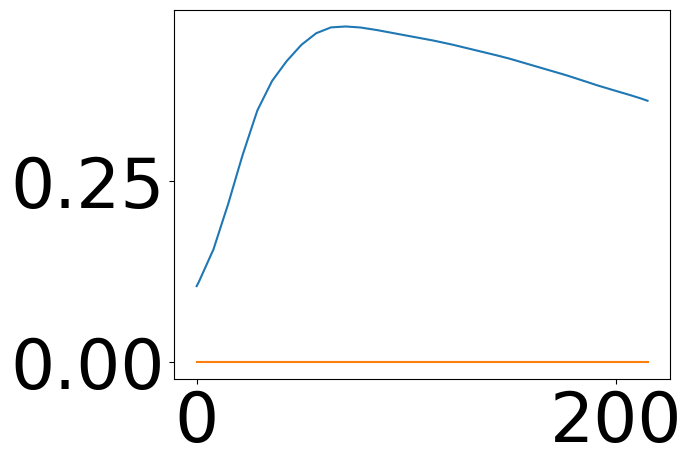

In [164]:
plt.plot(Mv_ovv)
plt.plot(Mv_ovv_1)

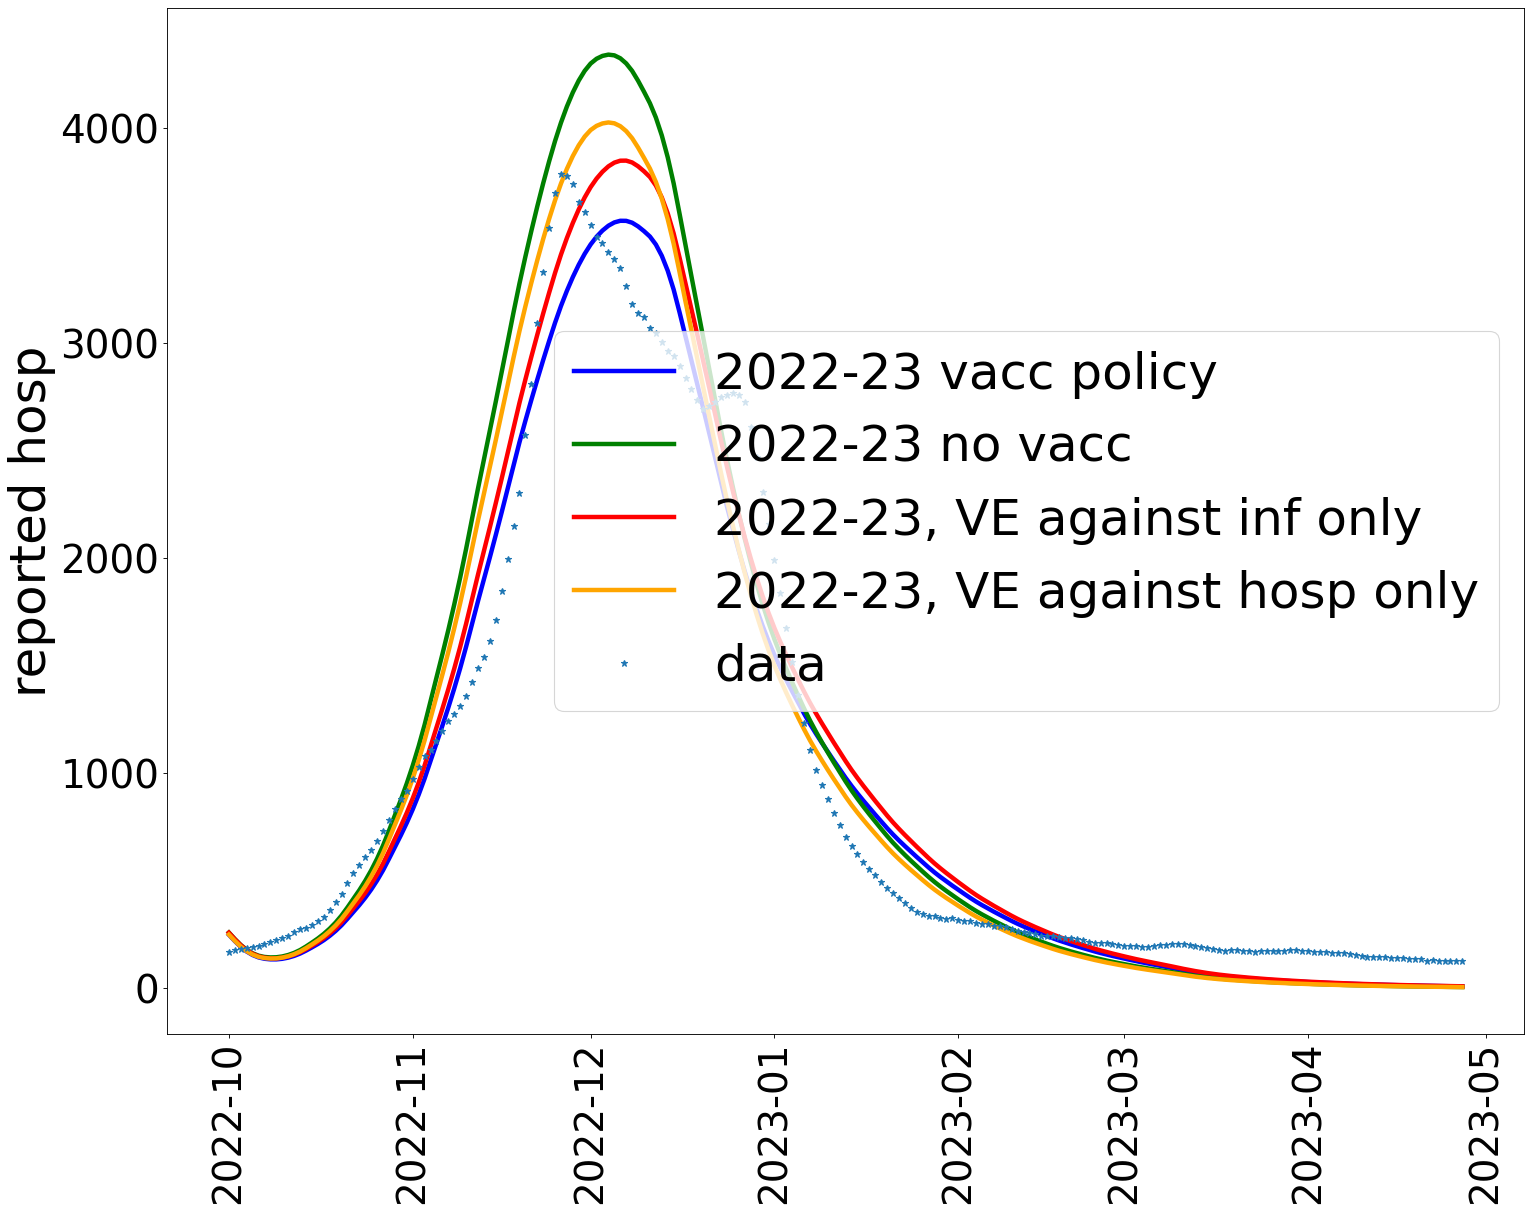

In [165]:
import matplotlib.dates as mdates
drange1 = pd.date_range("2022-10-01", periods=209, freq="1D")
#drange2 = pd.date_range("2022-08-08", periods=206, freq="1D")
drange3 = pd.date_range("2022-10-01", periods=209, freq="1D")
fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})
#plt.plot(drange, (cases['deaths_avg']), 'r*', label = 'Reported data')
#plt.plot(drange_mon, (cases2['deaths_d_avg']), 'r*', label = 'reported data')
#fig, ax = plt.subplots()
#plt_1 = plt.figure(figsize=(20, 16))
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_=plt.xticks(rotation=90)  

plt.plot(drange1, H_ov_avg, 'b', label = '2022-23 vacc policy', lw =4)
plt.plot(drange1, H_ov_avg_1, 'g', label = '2022-23 no vacc', lw =4)
plt.plot(drange1, H_ov_avg_2, 'r', label = '2022-23, VE against inf only', lw =4)
plt.plot(drange1, H_ov_avg_3, 'orange', label = '2022-23, VE against hosp only', lw =4)

#plt.plot(drange1, H_ov_avg2, 'r', label = 'high - pes', lw =4)
#plt.plot(drange1, H_ov_avg3, 'gray', label = 'low - pes', lw =4)


plt.plot(drange3, hosp_avg2, '*', label = 'data', lw =4)


#plt.plot(drange3, vacc_2[2,:])
#plt.plot(drange3, vacc_3[2,:])
#plt.plot(drange1, I_ov_avg0, label = 'Baseline (no-Omicron)', lw =4)

#plt.axis([19100, 19185, 0, 0.2e6])
plt.ylabel('reported hosp', fontsize = 45)

plt.legend(fontsize = 45)
plt.tight_layout()
#plt.savefig('fitus hosp')

In [166]:
cum_hosp_fit0 = np.zeros([202])
cum_hosp_fit1 = np.zeros([202])
cum_hosp_fit2 = np.zeros([202])
cum_hosp_fit3 = np.zeros([202])
cum_hosp_fit4 = np.zeros([202])
cum_hosp_fit5 = np.zeros([202])
for i in range(1,202):
    cum_hosp_fit0[i] = cum_hosp_fit0[i-1] + (H_ov_avgb0[i+7]/data_dem[0])*100000
    cum_hosp_fit1[i] = cum_hosp_fit1[i-1] + (H_ov_avgb1[i+7]/data_dem[1])*100000
    cum_hosp_fit2[i] = cum_hosp_fit2[i-1] + (H_ov_avgb2[i+7]/data_dem[2])*100000
    cum_hosp_fit3[i] = cum_hosp_fit3[i-1] + (H_ov_avgb3[i+7]/data_dem[3])*100000
    cum_hosp_fit4[i] = cum_hosp_fit4[i-1] + (H_ov_avgb4[i+7]/data_dem[4])*100000
    cum_hosp_fit5[i] = cum_hosp_fit5[i-1] + (H_ov_avgb5[i+7]/data_dem[5])*100000

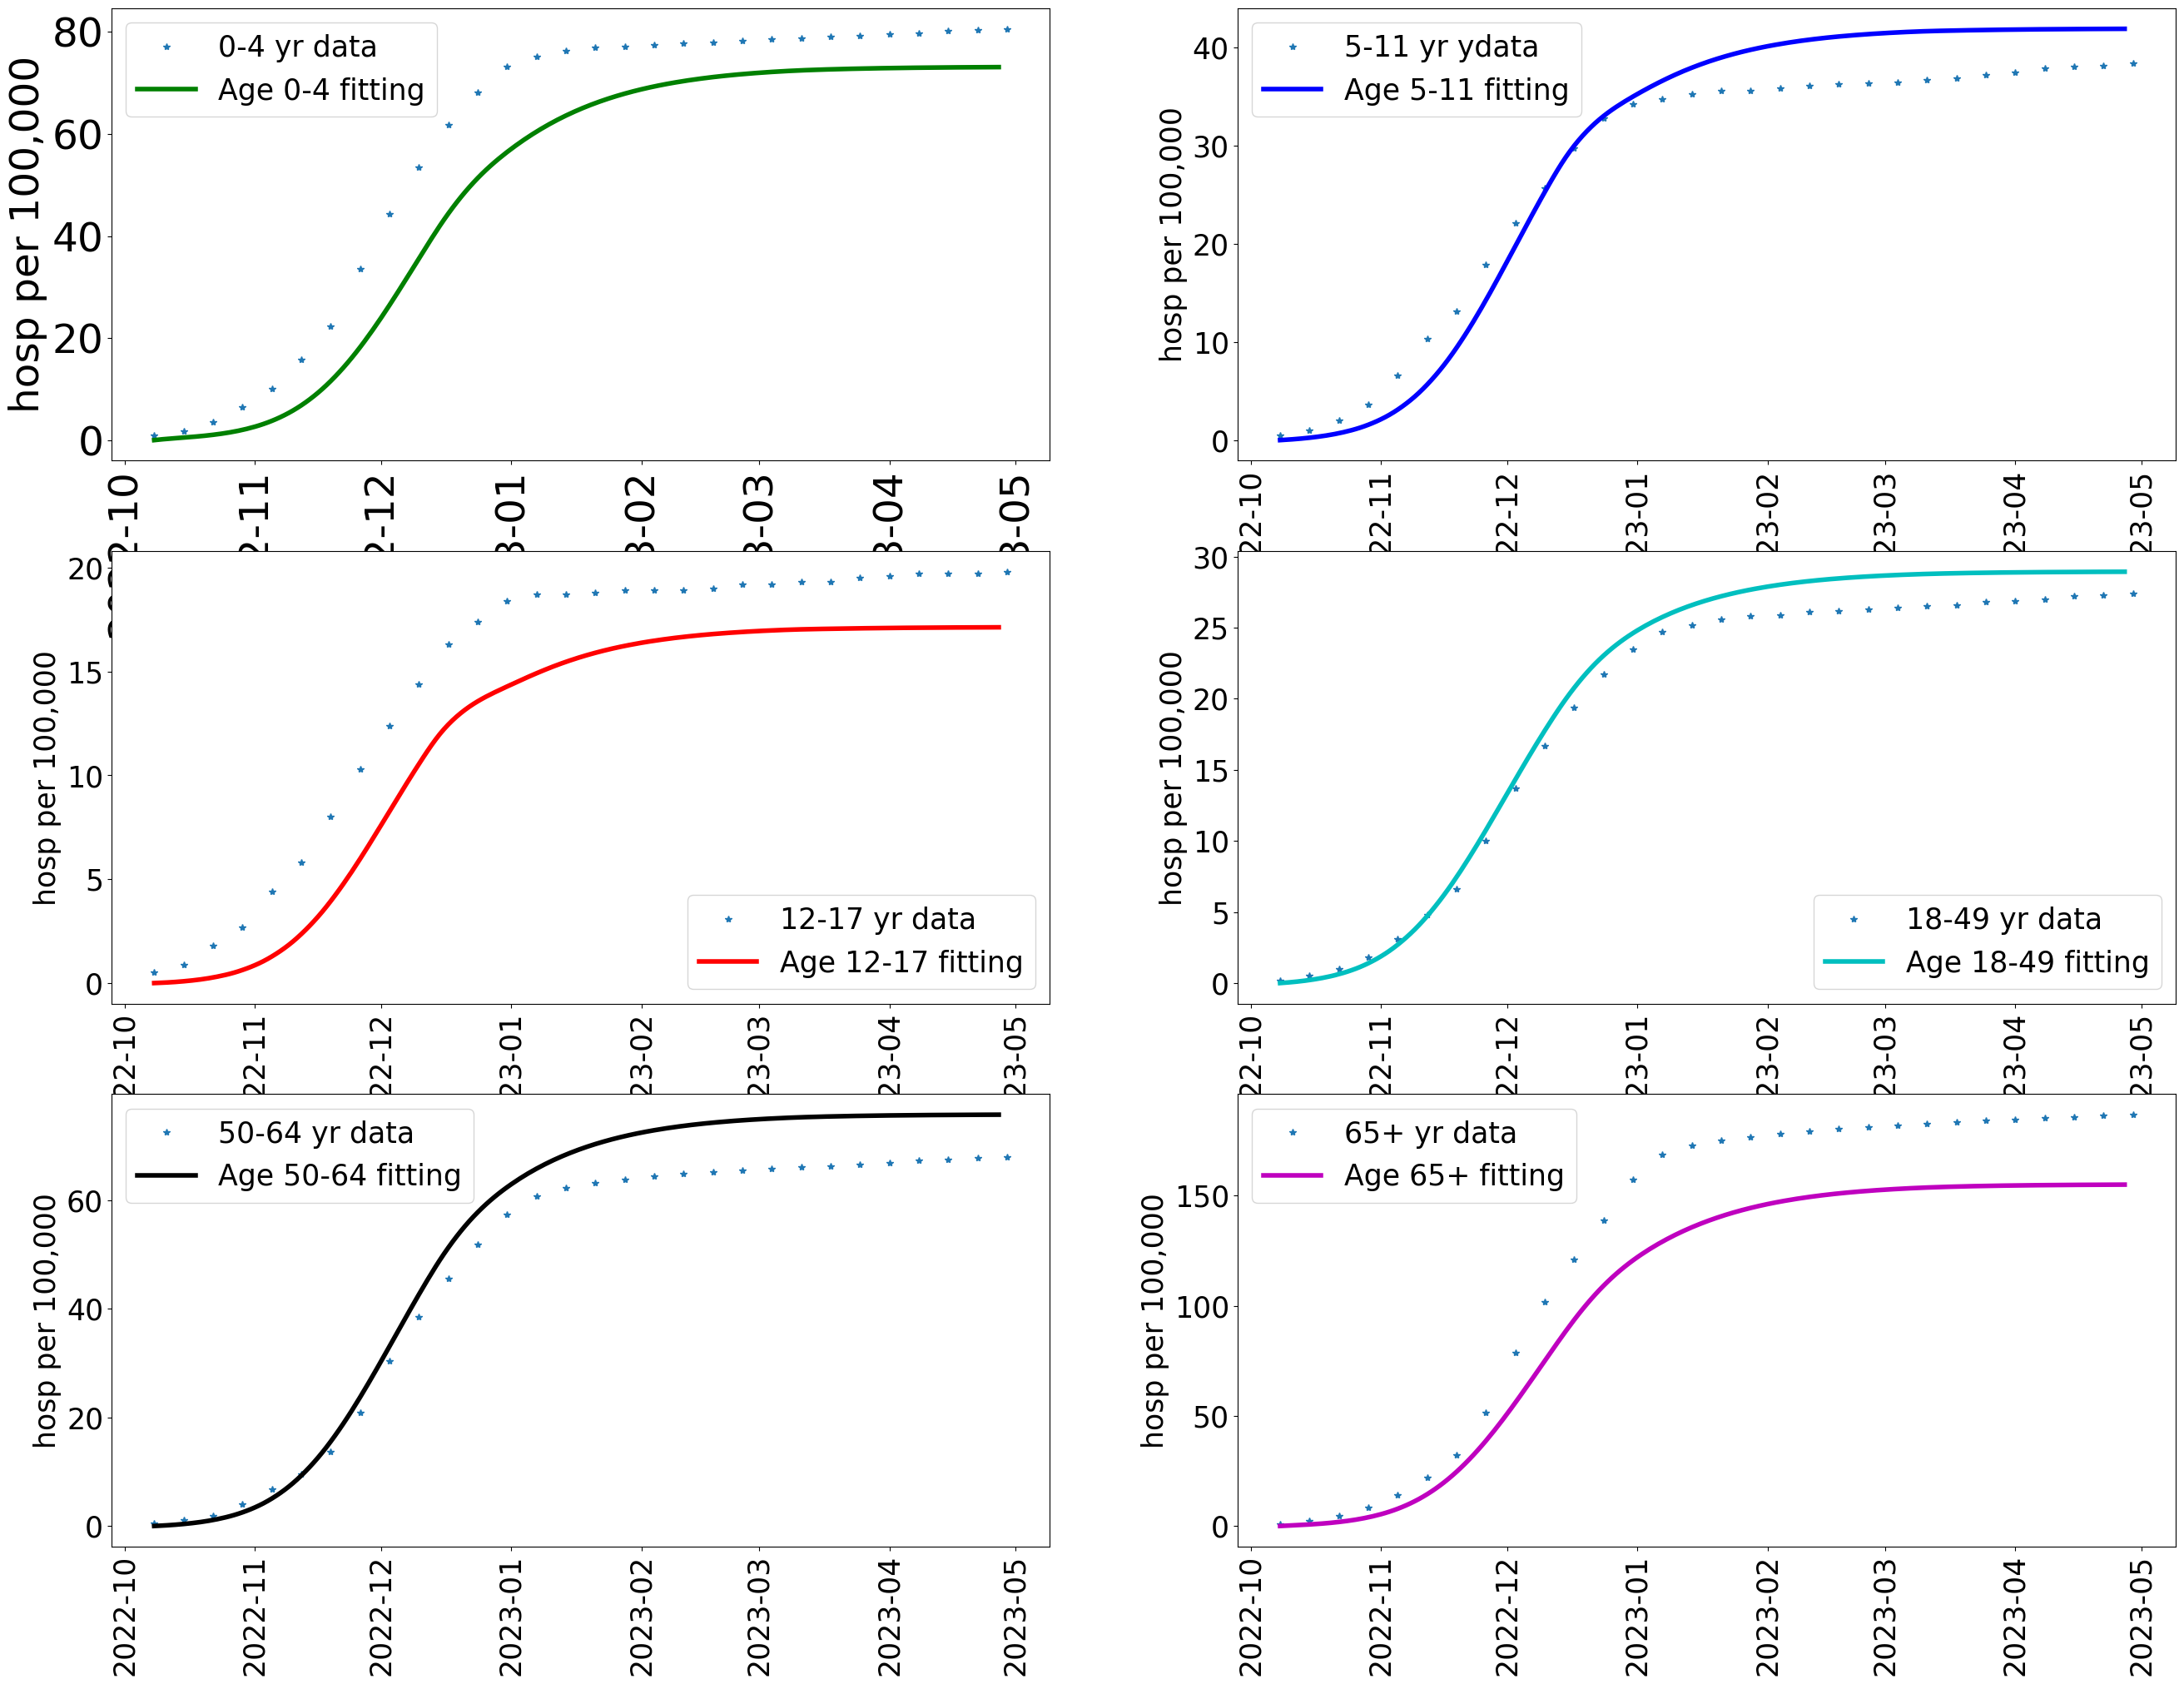

In [167]:
fig = plt.figure(figsize=(32, 24))
drange1 = pd.date_range("2022-10-08", periods=30, freq="7D")
drange2 = pd.date_range("2022-10-08", periods=202, freq="1D")

plt.subplot(3, 2, 1)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_04_array, '*', label = '0-4 yr data', lw =20)
plt.plot(drange2, cum_hosp_fit0,'g', label = 'Age 0-4 fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()

plt.subplot(3, 2, 2)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_511_array, '*', label = '5-11 yr ydata', lw =20)
plt.plot(drange2, cum_hosp_fit1,'b', label = 'Age 5-11 fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()

plt.subplot(3, 2, 3)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_1217_array, '*', label = '12-17 yr data', lw =20)
plt.plot(drange2, cum_hosp_fit2,'r', label = 'Age 12-17 fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()

plt.subplot(3, 2, 4)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_1849_array, '*', label = '18-49 yr data', lw =20)
plt.plot(drange2, cum_hosp_fit3,'c', label = 'Age 18-49 fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()


plt.subplot(3, 2, 5)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_5064_array, '*', label = '50-64 yr data', lw =20)
plt.plot(drange2, cum_hosp_fit4,'k', label = 'Age 50-64 fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()

plt.subplot(3, 2, 6)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_65_array, '*', label = '65+ yr data', lw =20)
plt.plot(drange2, cum_hosp_fit5,'m', label = 'Age 65+ fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()

plt.show()

In [168]:
def tau_cal(x): ## including stochasticity through tau-leap
    x=int(x)
    if (x>=0):
        tau_leap=int(np.random.poisson(x, 1))
    else:
        tau_leap=int(np.random.poisson(x*(-1), 1))*(-1)
    return tau_leap

In [169]:
np.sqrt(np.diag(pcov)[0]/(N*N))

0.0047737698701530735

In [171]:
def simulation_st(x, popt, sc1, sc2, seed_list):
    
    x0, x1, x2, x3,mag, ratio1, ratio2, ratio3 = popt[0], popt[1], popt[2], popt[3],popt[4], popt[5], popt[6],popt[7]
    Nd = 216# earlier it was 357 here, now I am taking 301 
    dt = 1 #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    I = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    
    S1 = np.zeros([6])
    E1 = np.zeros([6, ])
    I1 = np.zeros([6, ])
    H1 = np.zeros([6, ])
    R1 = np.zeros([6, ])
    M3_0 = set_imm(0.33)    
    D = np.zeros([6, ])
    M = np.array(M3_0)
    M1 = np.zeros([6, ])
    Mv = np.array(M_0)
  
    sigma = 0.000

    def dW(delta_t):
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S1_new = np.zeros([6, ])
    E1_new = np.zeros([6, ])
    I1_new = np.zeros([6, ])
    H1_new = np.zeros([6, ])
    R1_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    I_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])

    D_age = np.zeros([6, ])
    
    M_new = np.array(M3_0)
    M1_new = np.zeros([6, ])
    Mv_new = np.zeros([6, ])
        
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    hosp_cc1 = np.zeros([Nd, ])
    hosp_cc2 = np.zeros([Nd, ])
    hosp_cc3 = np.zeros([Nd, ])
    hosp_cc4 = np.zeros([Nd, ])
    hosp_cc5 = np.zeros([Nd, ])
    hosp_cc0 = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    M1_ov = np.zeros([Nd, 6])
    Mv_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M1_ovv = np.zeros([Nd, 6])
    Mv_ovv = np.zeros([Nd, ])
    Mv_ovv19 = np.zeros([Nd, 6])
    prot = np.zeros([Nd, 6])
    
    bita_s = np.zeros([Nd, ])    
    count = 0

    
    
    E0 = [ratio1*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio3*x2]
    I_0 = [ratio1*x1,ratio2*x1,ratio2*x1,ratio2*x1,ratio2*x1,ratio3*x1]
    H0 = [ratio1*x3,ratio2*x3,ratio2*x3,ratio2*x3,ratio2*x3,ratio3*x3]
    
    w2 = np.log(2)/(18*60)
    w1 = np.log(2)/(3*60)
    ww = 1/(10)
    
    D0 = [0/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - I_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    I = np.asarray(I_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M3_0)
    if (sc2 == "baseline"):
        Mv = np.asarray(M2_0)
    if (sc2 == "none"):
        Mv = np.zeros([6, ])
    for tt in range(int(Nd/dt)):        
        zx = 1
        seed_index=int(seed_list)
        np.random.seed(seed_index)
        rnd=np.random.normal(0, (np.sqrt(np.diag(pcov))/N)[0], 1)
        bita = (mag*(zz2[count]-1)+1)*((x0/N)+rnd)
        CM = CM_all
        if (school[count] == 0):
            CM = CM - CM_s

        if (work[count] == 0):
            CM = CM - CM_w - CM_s
                      
        K_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        K1_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        Kh_o = [4, 4, 4, 0.5, 0.5, 0.5]# natural imm against flu hosp
        K1h_o = [4, 4, 4, 0.5, 0.5, 0.5] # natural imm against flu hosp
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
            Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        '''
        '''
        ####our metanalysis proposal 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.5385, 0.5385, 0.3158]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.2346,0.2346,0.04]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.5385, 0.5385, 0.3158]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.2346,0.2346,0.04]# vacc eff against flu hosp
        '''   
        ###rebecca A:
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.3154, 0.3154, 0.3154, 0.25, 0.25, 0.1765]#vacc eff against flu infection
            Kvh_o = [1.381, 1.381, 1.381, 0.5156,0.5156,0.1628]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.3154, 0.3154, 0.3154, 0.25, 0.25, 0.1765]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.381, 1.381, 1.381, 0.5156,0.5156,0.1628]# vacc eff against flu hosp
        '''
        
        ###rebecca B:
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.4493, 0.4493, 0.4493, 0.4493, 0.4493, 0.4493]#vacc eff against flu infection
            Kvh_o = [1.127, 1.127, 1.127, 0.2987,0.2987,0]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.4493, 0.4493, 0.4493, 0.4493, 0.4493, 0.4493]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.127, 1.127, 1.127, 0.2987,0.2987,0]# vacc eff against flu hosp
        '''
        '''
        #### sensitivity analysis
        ## low scenario 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.3889, 0.3889, 0.3889, 0.1628, 0.1628, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.2346,0.2346,0.1111]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.3889,0.3889, 0.3889, 0.1628, 0.1628, 0]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.2346,0.2346,0.1111]# vacc eff against flu hosp
        
        '''
        '''
        ###high scenario 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [1.2222, 1.2222, 1.2222, 1.0408, 1.0408, 0.1818]#vacc eff against flu infection
            Kvh_o = [1.3809, 1.3809, 1.3809, 0.2195,0.2195,0]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [1.2222, 1.2222, 1.2222, 1.0408, 1.0408, 0.1818]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.3809, 1.3809, 1.3809, 0.2195,0.2195,0]# vacc eff against flu hosp
        '''
        
        ### NEW VE (METABIN AND VISION)
        
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.4925, 0.4925, 0.4925, 0.06, 0.06, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.04,0.04,0.4925]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.4925, 0.4925, 0.4925, 0.06, 0.06, 0]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.04,0.04,0.4925]# vacc eff against flu hosp


        for i in range(6):   
                
            prot_inf = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_inf1 = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_hosp = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            prot_hosp1 = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 

            S_new[i] = S[i] + dt*(-tau_cal(bita/(1 + prot_inf)*computerate(i, CM, 1, I, Ni)*S[i]) - tau_cal(bita/(1 + prot_inf1)*computerate(i, CM, 1, I1, Ni)*S[i]) + tau_cal(ww*R[i]) + tau_cal(ww*R1[i]))
            E_new[i] = E[i] + dt*(tau_cal(bita/(1 + prot_inf)*computerate(i, CM, 1, I , Ni)*S[i]) - tau_cal(g_E*E[i]))
                
            case_c_new[i] = case_c[i] + dt*tau_cal(g_E*E[i]) + tau_cal(g_E*E1[i])      
            I_new[i] = I[i] + dt*(tau_cal(g_E*E[i])  - tau_cal(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i]) - tau_cal(g_Recovery*IRec[i]*I[i]))
            hosp_c_new[i] = hosp_c[i] + dt*(tau_cal(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i]) + tau_cal(g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i]))
                
            H_new[i] = H[i] + dt*(tau_cal(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i])  - tau_cal((zx*HDR[i]*g_hosp/(1 + prot_hosp))*H[i]) - tau_cal(g_hosp*HDRec[i]*H[i]))
            D_new[i] = D[i] + dt*(tau_cal(zx*HDR[i]*g_hosp/(1 + prot_hosp)*H[i]) + tau_cal(zx*HDR[i]*g_hosp/(1 + prot_hosp1)*H1[i])) 
            R_new[i] = R[i] + dt*(tau_cal(g_hosp*HDRec[i]*H[i]) + tau_cal(g_Recovery*IRec[i]*I[i]) - tau_cal(ww*R[i]))
                
            E1_new[i] = E1[i] + dt*(tau_cal(bita/(1 + prot_inf1)*computerate(i, CM, 1, I1, Ni)*S[i]) - tau_cal(g_E*E1[i]))
            I1_new[i] = I1[i] + dt*(Seed[tt]*(data_dem[i]/N) + tau_cal(g_E*E1[i])  - tau_cal(g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i]) - tau_cal(g_Recovery*IRec[i]*I1[i]))
            # change seed to 0 will have no difference in pes and opt scenarios 
            #I1_new[i] = I1[i] + dt*(0*(data_dem[i]/N) + g_E*E1[i]  - g_Recovery*(IHR[i]/(1 + prot_inf1))*I1[i] - g_Recovery*IRec[i]*I1[i]) + I1_g

            H1_new[i] = H1[i] + dt*(tau_cal(g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i])  - tau_cal(zx*HDR[i]*g_hosp/(1 + prot_hosp1)*H1[i]) - tau_cal(g_hosp*HDRec[i]*H1[i]))
            R1_new[i] = R1[i] + dt*(tau_cal(g_hosp*HDRec[i]*H1[i]) + tau_cal(g_Recovery*IRec[i]*I1[i]) - tau_cal(ww*R1[i]))
                 #hosp_c[i] = H_new[i] + H1_new[i]
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
      
                
            if (count <= 480):
                if (sc2 == "baseline"):   
                    vacc_ref = vacc_1
                if (sc2 == "target"):   
                    vacc_ref = vacc_2
                if (sc2 == "none"):   
                    vacc_ref = vacc_3
                Mv_new[i] = Mv[i] + dt*(- w1*Mv[i] + k1*vacc_ref[i, count])
                M1_new[i] = M1[i] + dt*(-w2*M1[i] + k3*R1[i]/(prot_inf1))
                M_new[i] = M[i] + dt*(-w2*M[i] + k3*R[i]/(prot_inf))
                prot[count,i] = (1/(1+prot_inf))
                            
                            
        S = S_new; E = E_new; I = I_new; case_c = case_c_new; hosp_c = hosp_c_new; H = H_new; D = D_new; R = R_new; M = M_new; M1 = M1_new; Mv = Mv_new;
        S1 = S1_new; E1 = E1_new; I1 = I1_new; H1 = H1_new; R1 = R1_new;
        if(tt % int(1/dt) == 0):
            #bita_s[count] = np.sum(np.array(K1_b)*np.array(M22)) + np.sum(np.array(K1_v)*np.array(M)) + np.sum(np.array(K1_o12)*np.array(MX))
           
            for i in range(6):
                Mv_ovv19[count, i] = Mv[i]
               # prot[count,i] = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
                
           
        
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            hosp_cc0[count] = hosp_c[0]
            hosp_cc1[count] = hosp_c[1]
            hosp_cc2[count] = hosp_c[2]
            hosp_cc3[count] = hosp_c[3]
            hosp_cc4[count] = hosp_c[4]
            hosp_cc5[count] = hosp_c[5]
            
            #symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M1_ovv[count] = np.sum(np.array(data_dem)*np.array(M1))/N
            Mv_ovv[count] = np.sum(np.array(data_dem)*np.array(Mv))/N

            
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(I+H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    H_ova0 = cum_to_active(hosp_cc0)
    H_ova1 = cum_to_active(hosp_cc1)
    H_ova2 = cum_to_active(hosp_cc2)
    H_ova3 = cum_to_active(hosp_cc3)
    H_ova4 = cum_to_active(hosp_cc4)
    H_ova5 = cum_to_active(hosp_cc5)
    
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg0 = np.zeros([Nd-7, ])
    H_ov_avg1 = np.zeros([Nd-7, ])
    H_ov_avg2 = np.zeros([Nd-7, ])
    H_ov_avg3 = np.zeros([Nd-7, ])
    H_ov_avg4 = np.zeros([Nd-7, ])
    H_ov_avg5 = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = max(np.mean(D2_ova[i:i+7]), 0)
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
        H_ov_avg0[i] = max(np.mean(H_ova0[i:i+7]), 0)
        H_ov_avg1[i] = max(np.mean(H_ova1[i:i+7]), 0)
        H_ov_avg2[i] = max(np.mean(H_ova2[i:i+7]), 0)
        H_ov_avg3[i] = max(np.mean(H_ova3[i:i+7]), 0)
        H_ov_avg4[i] = max(np.mean(H_ova4[i:i+7]), 0)
        H_ov_avg5[i] = max(np.mean(H_ova5[i:i+7]), 0)
        

    peak_H = np.max(H_ov_avg)
    peak_D = np.max(H_ov_avg)
    peak_d_H=0
    peak_d_D=0
    
    for i in range(Nd-7):
        if (H_ov_avg[i] == peak_H):
            peak_d_H = i
            
        if (D_ov_avg[i] == peak_D):
            peak_d_D = i  
  

    return I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, Mv_ovv19, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, peak_H, peak_D, peak_d_H, peak_d_D,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5
    #return H_ov_avg

In [172]:
from numpy import genfromtxt ## generated seed table for respective comparison insteead of tptally random 
seed_table= genfromtxt('seed.csv', delimiter=',')
seed_table = seed_table[:,2]

In [173]:
#seed_table1= genfromtxt('seed.csv', delimiter=',')
#seed_table2 = seed_table1
#np.shape(seed_table2)

In [174]:
sc1 = "normal"
sc2 = "baseline"
I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, Mv_ovv19, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, peak_H, peak_D, peak_d_H, peak_d_D,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5=simulation_st(0, popt, sc1, sc2, seed_table[1])

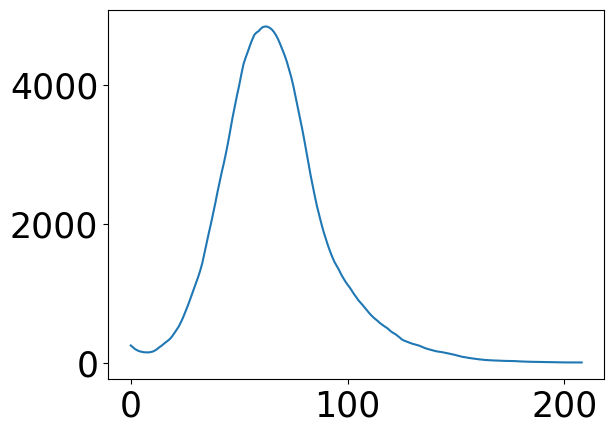

In [175]:
plt.plot(H_ov_avg)

In [176]:
Nsim = 100

In [177]:
def sim_scenario(scen):
    Nsim = 100
    simlen=209
    #popt, pcov = curve_fit(sim_hospA, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.0002*N]))
  
   #x0, x01, x02, x03, x04, x05, x06, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6], popt[7], popt[8], popt[9]

    if (scen == "A"):
        sc1 = "normal"
        sc2 = "baseline"
        print('scenario ',scen, 'loaded') 
        #popt, pcov = curve_fit(sim_hospA, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.000002*N]))
        #print(popt)
        #x0, x01, x02, x03, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6]

    if (scen == "B"):
        sc1 = "normal"
        sc2 = "none"
        print('scenario ',scen, 'loaded') 
        #popt, pcov = curve_fit(sim_hospB, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.000002*N]))
        #print(popt)
        #x0, x01, x02, x03, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6]
        
    if (scen == "C"):
        sc1 = "aginstinf"
        sc2 = "baseline"
        print('scenario ',scen, 'loaded') 
        #popt, pcov = curve_fit(sim_hospC, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.000002*N]))
        #print(popt)
        #x0, x01, x02, x03, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6]

    if (scen == "D"):
        sc1 = "aginsthosp"
        sc2 = "baseline"
        print('scenario ',scen, 'loaded') 
        #popt, pcov = curve_fit(sim_hospD, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.000002*N]))
        #print(popt)
        #x0, x01, x02, x03, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6]
    

    print('fitting completed')         
    new_hosp = np.zeros([simlen, Nsim])
    new_death = np.zeros([simlen, Nsim])
    
    new_peak_H = np.zeros([simlen, Nsim])
    new_peak_D = np.zeros([simlen, Nsim])
    
    new_peak_d_H = np.zeros([simlen, Nsim])
    new_peak_d_D = np.zeros([simlen, Nsim])
    
    new_hosp0 = np.zeros([simlen, Nsim])
    new_hosp1 = np.zeros([simlen, Nsim])
    new_hosp2 = np.zeros([simlen, Nsim])
    new_hosp3 = np.zeros([simlen, Nsim])
    new_hosp4 = np.zeros([simlen, Nsim])
    new_hosp5 = np.zeros([simlen, Nsim])

    for i in range(Nsim):
        seed_list = seed_table[i]
        I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, Mv_ovv19, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, peak_H, peak_D, peak_d_H, peak_d_D,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5 = simulation_st(0, popt, sc1, sc2, seed_list)
        
        new_hosp[:,i] = H_ov_avg
        new_death[:,i] = D_ov_avg
        
        new_peak_H[:,i] = peak_H
        new_peak_D[:,i] = peak_D

        new_peak_d_H[:,i] = peak_d_H
        new_peak_d_D[:,i] = peak_d_D
        
        new_hosp0[:,i] = H_ov_avg0
        new_hosp1[:,i] = H_ov_avg1
        new_hosp2[:,i] = H_ov_avg2
        new_hosp3[:,i] = H_ov_avg3
        new_hosp4[:,i] = H_ov_avg4
        new_hosp5[:,i] = H_ov_avg5
               

    print("computing percentiles for, ", scen)
    new_hosp_p = np.zeros([simlen, 25]) ## 301-7 
    new_death_p = np.zeros([simlen, 25])
    
    new_peak_H_p = np.zeros([simlen, 25])
    new_peak_D_p = np.zeros([simlen, 25])
    
    new_peak_d_H_p = np.zeros([simlen, 25])
    new_peak_d_D_p = np.zeros([simlen, 25])
    
    new_hosp_p0 = np.zeros([simlen, 25]) ## 301-7
    new_hosp_p1 = np.zeros([simlen, 25]) ## 301-7
    new_hosp_p2 = np.zeros([simlen, 25]) ## 301-7
    new_hosp_p3 = np.zeros([simlen, 25]) ## 301-7
    new_hosp_p4 = np.zeros([simlen, 25]) ## 301-7
    new_hosp_p5 = np.zeros([simlen, 25]) ## 301-7

    

    for i in range(simlen):
        #new_hosp_p[i,:] = np.percentile(new_hosp[i,:], [100*0.025, 100*0.5, 100*0.95])
        new_hosp_p[i,:] = np.percentile(new_hosp[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_death_p[i,:] = np.percentile(new_death[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])

        #new_peak_H_p[i,:] = np.percentile(new_peak_H[i,:], [100*0.025, 100*0.5, 100*0.95])                                
        new_peak_H_p[i,:] = np.percentile(new_peak_H[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_peak_D_p[i,:] = np.percentile(new_peak_D[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
         
        #new_peak_d_H_p[i,:] = np.percentile(new_peak_H[i,:], [100*0.025, 100*0.5, 100*0.95])
        new_peak_d_H_p[i,:] = np.percentile(new_peak_d_H[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_peak_d_D_p[i,:] = np.percentile(new_peak_d_D[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        
        new_hosp_p0[i,:] = np.percentile(new_hosp0[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p1[i,:] = np.percentile(new_hosp1[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p2[i,:] = np.percentile(new_hosp2[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p3[i,:] = np.percentile(new_hosp3[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p4[i,:] = np.percentile(new_hosp4[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p5[i,:] = np.percentile(new_hosp5[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])

        
    return new_hosp_p, new_death_p, new_peak_H_p, new_peak_D_p, new_peak_d_H_p, new_peak_d_D_p, new_hosp_p0, new_hosp_p1, new_hosp_p2, new_hosp_p3, new_hosp_p4, new_hosp_p5,new_hosp0,new_hosp1,new_hosp2,new_hosp3,new_hosp4,new_hosp5,new_hosp
    #return new_hosp_p, new_peak_H_p, new_peak_d_H_p


In [178]:

new_hosp_p_A, new_death_p_A, new_peak_H_p_A, new_peak_D_p_A, new_peak_d_H_p_A, new_peak_d_D_p_A, new_hosp_p0_A, new_hosp_p1_A, new_hosp_p2_A, new_hosp_p3_A, new_hosp_p4_A, new_hosp_p5_A,new_hosp_0_A, new_hosp_1_A, new_hosp_2_A, new_hosp_3_A, new_hosp_4_A, new_hosp_5_A, new_hosp_A = sim_scenario('A')
new_hosp_p_B, new_death_p_B, new_peak_H_p_B, new_peak_D_p_B, new_peak_d_H_p_B, new_peak_d_D_p_B ,new_hosp_p0_B, new_hosp_p1_B, new_hosp_p2_B, new_hosp_p3_B, new_hosp_p4_B, new_hosp_p5_B,new_hosp_0_B, new_hosp_1_B, new_hosp_2_B, new_hosp_3_B, new_hosp_4_B, new_hosp_5_B, new_hosp_B = sim_scenario('B')
new_hosp_p_C, new_death_p_C, new_peak_H_p_C, new_peak_D_p_C, new_peak_d_H_p_C, new_peak_d_D_p_C, new_hosp_p0_C, new_hosp_p1_C, new_hosp_p2_C, new_hosp_p3_C, new_hosp_p4_C, new_hosp_p5_C,new_hosp_0_C, new_hosp_1_C, new_hosp_2_C, new_hosp_3_C, new_hosp_4_C, new_hosp_5_C, new_hosp_C = sim_scenario('C')
new_hosp_p_D, new_death_p_D, new_peak_H_p_D, new_peak_D_p_D, new_peak_d_H_p_D, new_peak_d_D_p_D, new_hosp_p0_D, new_hosp_p1_D, new_hosp_p2_D, new_hosp_p3_D, new_hosp_p4_D, new_hosp_p5_D,new_hosp_0_D, new_hosp_1_D, new_hosp_2_D, new_hosp_3_D, new_hosp_4_D, new_hosp_5_D, new_hosp_D = sim_scenario('D')


scenario  A loaded
fitting completed
computing percentiles for,  A
scenario  B loaded
fitting completed
computing percentiles for,  B
scenario  C loaded
fitting completed
computing percentiles for,  C
scenario  D loaded
fitting completed
computing percentiles for,  D


In [179]:
print(sum(new_hosp_p_B[:,2]-new_hosp_p_A[:,2]))
print(sum(new_hosp_p_B[:,12]-new_hosp_p_A[:,12]))
print(sum(new_hosp_p_B[:,22]-new_hosp_p_A[:,22]))


print(sum(new_hosp_p_C[:,2]-new_hosp_p_A[:,2]))
print(sum(new_hosp_p_C[:,12]-new_hosp_p_A[:,12]))
print(sum(new_hosp_p_C[:,22]-new_hosp_p_A[:,22]))

print(sum(new_hosp_p_D[:,2]-new_hosp_p_A[:,2]))
print(sum(new_hosp_p_D[:,12]-new_hosp_p_A[:,12]))
print(sum(new_hosp_p_D[:,22]-new_hosp_p_A[:,22]))

10098.682142857138
31914.428571428565
55289.44642857138
3255.9178571428547
15100.642857142866
35682.724999999984
7008.146428571428
15069.428571428582
18271.882142857103


In [180]:
##### VE_H = 0 and VE_I = 0 impacts 

In [181]:
### impact by reducing severity (i.e sus only vaccine (normal(VE_H, VE_I !=0) - VE_H =0)

diff0=np.zeros([Nsim, ])
for i in range(Nsim):
    diff0[i]=(sum(new_hosp_C[:,i])-sum(new_hosp_A[:,i]))/sum(new_hosp_C[:,i])
#print(diff)
diff_precentile0= np.percentile(diff0, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile0)


'''
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_C[:,i])-sum(new_hosp_A[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)
'''

diff018=np.zeros([Nsim, ])
for i in range(Nsim):
    diff018[i]=(sum((new_hosp_0_C[:,i]+new_hosp_1_C[:,i]+new_hosp_2_C[:,i]))-sum((new_hosp_0_A[:,i]+new_hosp_1_A[:,i]+new_hosp_2_A[:,i])))/sum((new_hosp_0_C[:,i]+new_hosp_1_C[:,i]+new_hosp_2_C[:,i]))
#print(diff)
diff_precentile018= np.percentile(diff018, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile018)

diff1849=np.zeros([Nsim, ])
for i in range(Nsim):
    diff1849[i]=(sum(new_hosp_3_C[:,i])-sum(new_hosp_3_A[:,i]))/sum(new_hosp_3_C[:,i])
#print(diff)
diff_precentile1849= np.percentile(diff1849, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile1849)

diff4964=np.zeros([Nsim, ])
for i in range(Nsim):
    diff4964[i]=(sum(new_hosp_4_C[:,i])-sum(new_hosp_4_A[:,i]))/sum(new_hosp_4_C[:,i])
#print(diff)
diff_precentile4964= np.percentile(diff4964, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile4964)

diff65=np.zeros([Nsim, ])
for i in range(Nsim):
    diff65[i]=(sum(new_hosp_5_C[:,i])-sum(new_hosp_5_A[:,i]))/sum(new_hosp_5_C[:,i])
#print(diff)
diff_precentile65= np.percentile(diff65, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile65)

[0.05710713 0.07106763 0.07939662]
[0.02885376 0.03823636 0.05696056]
[0.00039834 0.01459097 0.0373776 ]
[-0.00494957  0.01240626  0.03237506]
[0.12075299 0.13337368 0.14554245]


In [182]:
### impact by reducing severity (i.e sus only vaccine (normal(VE_H, VE_I !=0) - VE_H =0)
##numbers 

diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_C[:,i])-sum(new_hosp_A[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)


diff018=np.zeros([Nsim, ])
for i in range(Nsim):
    diff018[i]=(sum((new_hosp_0_C[:,i]+new_hosp_1_C[:,i]+new_hosp_2_C[:,i]))-sum((new_hosp_0_A[:,i]+new_hosp_1_A[:,i]+new_hosp_2_A[:,i])))
#print(diff)
diff_precentile018= np.percentile(diff018, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile018)

diff1849=np.zeros([Nsim, ])
for i in range(Nsim):
    diff1849[i]=(sum(new_hosp_3_C[:,i])-sum(new_hosp_3_A[:,i]))
#print(diff)
diff_precentile1849= np.percentile(diff1849, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile1849)

diff4964=np.zeros([Nsim, ])
for i in range(Nsim):
    diff4964[i]=(sum(new_hosp_4_C[:,i])-sum(new_hosp_4_A[:,i]))
#print(diff)
diff_precentile4964= np.percentile(diff4964, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile4964)

diff65=np.zeros([Nsim, ])
for i in range(Nsim):
    diff65[i]=(sum(new_hosp_5_C[:,i])-sum(new_hosp_5_A[:,i]))
#print(diff)
diff_precentile65= np.percentile(diff65, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile65)

[ 3914.09642857 15226.28571429 34494.06071429]
[ 466.98571429 1313.71428571 2908.99285714]
[  14.85        524.35714286 1553.35      ]
[-199.58928571  597.28571429 1578.3       ]
[ 2679.02857143 12839.35714286 30284.09642857]


In [183]:
print([3914*100000/N,15226*100000/N,34494*100000/N])
print([ 466.98571429 *100000/N017,1313.71428571*100000/N017,2908.99285714*100000/N017])
print([ 14.85*100000/N1849,524.35714286*100000/N1849,1553.35*100000/N1849])
print([ -199.58928571*100000/N64,597.28571429*100000/N64,1578.3*100000/N64])
print([ 2679.02857143*100000/N65,12839.35714286*100000/N65,30284.09642857*100000/N65])

[1.225999969929484, 4.769309029674584, 10.804712049756674]
[0.6201018940775137, 1.7444574682204654, 3.8627990650914446]
[0.011633016128353275, 0.4107646531924325, 1.2168448217493306]
[-0.31429656443164383, 0.9405557383386227, 2.485375233835058]
[5.075426919424904, 24.324197048857332, 57.37330310067577]


In [184]:
100000/N017

0.0013278819353613632

In [185]:
#### For our supplementary paper Calculating per 100K for all other tables :
'''
print(17823 *100000/N017)
print([13681*100000/N017, 22267*100000/N017])
print(3894*100000/N1849)
print([2481*100000/N1849,5072*100000/N1849])
print(5545*100000/N64)
print([3869*100000/N64, 7116*100000/N64])
print(14069*100000/N65)
print([10446*100000/N65, 18062*100000/N65])
print(41011*100000/N)
print([32253*100000/N,49389*100000/N])
'''
'''
print(7527*100000/N017)
print([6805*100000/N017,8145*100000/N017])
print(20972*100000/N1849)
print([16819*100000/N1849,24771*100000/N1849])
print(9672*100000/N64)
print([8521*100000/N64,10874*100000/N64])
print(22520*100000/N65)
print([19489*100000/N65,25073*100000/N65])
print(60614*100000/N)
print([53003*100000/N,67195*100000/N])
'''
'''
print(1776*100000/N017)
print([1564*100000/N017,2089*100000/N017])
print(1561*100000/N1849)
print([1109*100000/N1849,2148*100000/N1849])
print(24115*100000/N64)
print([17818*100000/N64,30280*100000/N64])
print(7635*100000/N65)
print([6209*100000/N65,9600*100000/N65])
print(34593*100000/N)
print([27746*100000/N,43599*100000/N])
'''

'''
print(44*100000/N017)
print([-43*100000/N017,154*100000/N017])
print(26*100000/N1849)
print([-165*100000/N1849,170*100000/N1849]) 
print(67*100000/N64)
print([-172*100000/N64,211*100000/N64])
print(31657*100000/N65)
print([20486*100000/N65,43486*100000/N65])
print(31758*100000/N)
print([20566*100000/N,43530*100000/N])
'''

'''
print(25370*100000/N017)
print([18886*100000/N017, 29984*100000/N017])
print(25198*100000/N1849)
print([20179*100000/N1849,29426*100000/N1849])
print(36090*100000/N64)
print([26931*100000/N64,42171*100000/N64])
print(68553*100000/N65)
print([48359*100000/N65,83607*100000/N65])
print(154868*100000/N)
print([115021*100000/N,185310*100000/N])
'''

'''
print(16002*100000/N017)
print([10949*100000/N017, 21059*100000/N017])
print(3156*100000/N1849)
print([1925*100000/N1849, 4146*100000/N1849])
print(4497*100000/N64)
print([2775*100000/N64, 5830*100000/N64])
print(12002*100000/N65)
print([8211*100000/N65, 16293*100000/N65])
print(35320*100000/N)
print([25331*100000/N, 45416*100000/N])
'''

'''
print(6211*100000/N017)
print([4495*100000/N017, 6948*100000/N017])
print(19754*100000/N1849)
print([15742*100000/N1849, 24039*100000/N1849])
print(7544*100000/N64)
print([6024*100000/N64, 9023*100000/N64])
print(18698*100000/N65)
print([14620*100000/N65, 23622*100000/N65])
print(52215*100000/N)
print([41600*100000/N, 62689*100000/N])
'''

'''
print(1517*100000/N017)
print([980*100000/N017, 1875*100000/N017])
print(1266*100000/N1849)
print([812*100000/N1849, 1715*100000/N1849])
print(20184*100000/N64)
print([13260*100000/N64, 26832*100000/N64])
print(6101*100000/N65)
print([4227*100000/N65, 8399*100000/N65])
print(29022*100000/N)
print([19969*100000/N, 39343*100000/N])
'''

'''
print(31*100000/N017)
print([-65*100000/N017, 96*100000/N017])
print(25*100000/N1849)
print([-173*100000/N1849, 177*100000/N1849])
print(63*100000/N64)
print([-72*100000/N64, 256*100000/N64])
print(23165*100000/N65)
print([12901*100000/N65, 35474*100000/N65])
print(23222*100000/N)
print([13045*100000/N, 35636*100000/N])
'''

'''
print(3383*100000/N017)
print([2116*100000/N017, 5578*100000/N017])
print(1267*100000/N1849)
print([707*100000/N1849, 2012*100000/N1849])
print(2378*100000/N64)
print([1281*100000/N64, 4083*100000/N64])
print(6045*100000/N65)
print([3169*100000/N65, 10565*100000/N65])
print(13167*100000/N)
print([7700*100000/N, 21695*100000/N])
'''

'''
print(7570*100000/N017)
print([5730*100000/N017, 10359*100000/N017])
print(12026*100000/N1849)
print([8875*100000/N1849, 15464*100000/N1849])
print(8415*100000/N64)
print([6199*100000/N64, 10724*100000/N64])
print(21976*100000/N65)
print([16578*100000/N65, 29933*100000/N65])
print(50549*100000/N)
print([38342*100000/N, 66069*100000/N])
'''

'''
print(2356*100000/N017)
print([1377*100000/N017, 3970*100000/N017])
print(1196*100000/N1849)
print([722*100000/N1849, 1874*100000/N1849])
print(5465*100000/N64)
print([3130*100000/N64, 8734*100000/N64])
print(6060*100000/N65)
print([3337*100000/N65, 10624*100000/N65])
print(15102*100000/N)
print([9931*100000/N, 24807*100000/N])
'''

print(2033*100000/N017)
print([1122*100000/N017, 3416*100000/N017])
print(913*100000/N1849)
print([362*100000/N1849, 1469*100000/N1849])
print(1701*100000/N64)
print([953*100000/N64, 3006*100000/N64])
print(4629*100000/N65)
print([2440*100000/N65, 8455*100000/N65])
print(9273*100000/N)
print([5330*100000/N, 15472*100000/N])





2.6995839745896513
[1.4898835314754495, 4.536044691194417]
0.7152150656691273
[0.28357924838140647, 1.1507677234041052]
2.6785929625251432
[1.5007049343247862, 4.7335981454148035]
8.769653097606675
[4.622586640345709, 16.018020509886462]
2.9046238429116262
[1.6695400714675905, 4.846364725280781]


In [186]:
v17=37441604
v49=55805434
v64=35589356
v65=44533894
v=173370290



In [187]:
### table Number of hospitalizations averted per 100K in age group i per individual vaccinated in age group j in paper 

'''
print(23.67/v017)
print([18.16/v017, 29.56/v017])
print(3.05/v017)
print([1.94/v017, 3.97/v017])
print(8.73/v017)
print([6.09/v017, 11.21/v017])
print(26.65/v017)
print([19.78/v017, 34.22/v017])
print(12.85/v017)
print([10.10/v017, 15.47/v017])
'''

'''
print(9.99/v1849)
print([9.04/v1849, 10.81/v1849])
print(16.43/v1849)
print([13.17/v1849, 19.40/v1849])
print(15.23/v1849)
print([13.42/v1849, 17.12/v1849])
print(42.66/v1849)
print([36.92/v1849, 47.50/v1849])
print(18.99/v1849)
print([16.60/v1849, 21.05/v1849])
'''

'''
print(2.36/v5064)
print([2.07/v5064, 2.77/v5064])
print(1.22/v5064)
print([0.87/v5064, 1.68/v5064])
print(37.97/v5064)
print([28.06/v5064, 47.68/v5064])
print(14.46/v5064)
print([11.76/v5064, 18.19/v5064])
print(10.83/v5064)
print([8.69/v5064, 13.65/v5064])
'''

'''
print(0.06/v65)
print([-0.06/v65, 0.20/v65])
print(0.02/v65)
print([-0.13/v65, 0.13/v65])
print(0.11/v65)
print([-0.27/v65, 0.33/v65])
print(59.97/v65)
print([38.81/v65, 82.38/v65])
print(9.95/v65)
print([6.44/v65, 13.63/v65])
'''

print(33.69/(v017+v1849+v5064+v65))
print([25.08/(v017+v1849+v5064+v65), 39.81/(v017+v1849+v5064+v65)])
print(19.74/(v017+v1849+v5064+v65))
print([15.81/(v017+v1849+v5064+v65), 23.05/(v017+v1849+v5064+v65)])
print(56.83/(v017+v1849+v5064+v65))
print([42.41/(v017+v1849+v5064+v65), 66.41/(v017+v1849+v5064+v65)])
print(129.87/(v017+v1849+v5064+v65))
print([91.62/(v017+v1849+v5064+v65), 158.39/(v017+v1849+v5064+v65)])
print(48.51/(v017+v1849+v5064+v65))
print([36.03/(v017+v1849+v5064+v65), 58.04/(v017+v1849+v5064+v65)])





NameError: name 'v017' is not defined

In [ ]:
2.8e-07
[2.1e-07, 3.3e-07]
1.6e-07
[1.3e-07, 1.9e-07]
4.7e-07
[3.5e-07, 5.6e-07]
1.1e-06
[7.7e-07, 1.3e-06]
4.1e-07
[3.0e-07, 4.8e-07]

In [188]:
### impact by reducing susceptibility (i.e severity only vaccine (normal(VE_H, VE_I !=0) - VE_I =0)

diff0=np.zeros([Nsim, ])
for i in range(Nsim):
    diff0[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_C[:,i]))/sum(new_hosp_B[:,i])
##print(max(diff0)) ### to find out which simualtion percentage maximum
diff_precentile0= np.percentile(diff0, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile0)

'''
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_C[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)
'''

diff018=np.zeros([Nsim, ])
for i in range(Nsim):
    diff018[i]=(sum((new_hosp_0_B[:,i]+new_hosp_1_B[:,i]+new_hosp_2_B[:,i]))-sum((new_hosp_0_C[:,i]+new_hosp_1_C[:,i]+new_hosp_2_C[:,i])))/sum((new_hosp_0_B[:,i]+new_hosp_1_B[:,i]+new_hosp_2_B[:,i]))
#print(diff)
diff_precentile018= np.percentile(diff018, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile018)

diff1849=np.zeros([Nsim, ])
for i in range(Nsim):
    diff1849[i]=(sum(new_hosp_3_B[:,i])-sum(new_hosp_3_C[:,i]))/sum(new_hosp_3_B[:,i])
#print(diff)
diff_precentile1849= np.percentile(diff1849, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile1849)

diff4964=np.zeros([Nsim, ])
for i in range(Nsim):
    diff4964[i]=(sum(new_hosp_4_B[:,i])-sum(new_hosp_4_C[:,i]))/sum(new_hosp_4_B[:,i])
#print(diff)
diff_precentile4964= np.percentile(diff4964, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile4964)

diff65=np.zeros([Nsim, ])
for i in range(Nsim):
    diff65[i]=(sum(new_hosp_5_B[:,i])-sum(new_hosp_5_C[:,i]))/sum(new_hosp_5_B[:,i])
#print(diff)
diff_precentile65= np.percentile(diff65, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile65)

[0.03886584 0.07199543 0.12834655]
[0.04969306 0.08865521 0.15796648]
[0.02845876 0.05464317 0.12068594]
[0.03415016 0.06668521 0.1201021 ]
[0.03925617 0.07189508 0.13041819]


In [189]:
0.13968446+0.00582759

0.14551205

In [190]:
0.6095609-0.13968446

0.46987643999999995

In [191]:
### impact by reducing susceptibility (i.e severity only vaccine (normal(VE_H, VE_I !=0) - VE_I =0)
##numbers 


diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_C[:,i]))
#print((diff))
#print(sum(new_hosp_B[:,21]))  ### cross verifying reasoning for why the difference so we printed this.. we wanted to see whats the max perecntage and respective simulation like above and the see whats maximum number and that was for 21 simulation so here we cross check that the value for scenario is very high so the difference is more. Not necessary same as percentage simulation aove. so thats how we explain all thisb 
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)


diff018=np.zeros([Nsim, ])
for i in range(Nsim):
    diff018[i]=(sum((new_hosp_0_B[:,i]+new_hosp_1_B[:,i]+new_hosp_2_B[:,i]))-sum((new_hosp_0_C[:,i]+new_hosp_1_C[:,i]+new_hosp_2_C[:,i])))
#print(diff)
diff_precentile018= np.percentile(diff018, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile018)

diff1849=np.zeros([Nsim, ])
for i in range(Nsim):
    diff1849[i]=(sum(new_hosp_3_B[:,i])-sum(new_hosp_3_C[:,i]))
#print(diff)
diff_precentile1849= np.percentile(diff1849, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile1849)

diff4964=np.zeros([Nsim, ])
for i in range(Nsim):
    diff4964[i]=(sum(new_hosp_4_B[:,i])-sum(new_hosp_4_C[:,i]))
#print(diff)
diff_precentile4964= np.percentile(diff4964, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile4964)

diff65=np.zeros([Nsim, ])
for i in range(Nsim):
    diff65[i]=(sum(new_hosp_5_B[:,i])-sum(new_hosp_5_C[:,i]))
#print(diff)
diff_precentile65= np.percentile(diff65, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile65)

[ 7908.18928571 16025.5        20470.57142857]
[1629.74642857 3396.07142857 4213.15714286]
[1115.125      2074.07142857 2798.85      ]
[1677.72142857 3382.85714286 4249.38571429]
[3072.78214286 7204.85714286 9884.975     ]


In [192]:
print([ 84670.23571429*100000/N,103105.35714286*100000/N,113641.35*100000/N])
print([14001.20357143*100000/N017,16942*100000/N017, 18440.75714286*100000/N017])
print([11325.38928571*100000/N1849,12437.42857143*100000/N1849,13647.97857143*100000/N1849])
print([18570.15*100000/N64,21656.85714286*100000/N64,23120.23571429*100000/N64])
print([40077.05714286*100000/N65,52259.5*100000/N65,59579.06428571*100000/N65])

[26.521641910996898, 32.29615859905852, 35.59639542226519]
[18.591945295818896, 22.496975748892215, 24.487148284389814]
[8.871948567039988, 9.743084657689364, 10.691390898374753]
[29.242723752519865, 34.10341277676495, 36.40781932758358]
[75.92609382498206, 99.00576497178139, 112.87269943091033]


In [193]:
### impact of none - baseline  

diff0=np.zeros([Nsim, ])
for i in range(Nsim):
    diff0[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_A[:,i]))/sum(new_hosp_B[:,i])
#print(diff)
diff_precentile0= np.percentile(diff0, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile0)

'''
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_A[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)
'''

diff018=np.zeros([Nsim, ])
for i in range(Nsim):
    diff018[i]=(sum((new_hosp_0_B[:,i]+new_hosp_1_B[:,i]+new_hosp_2_B[:,i]))-sum((new_hosp_0_A[:,i]+new_hosp_1_A[:,i]+new_hosp_2_A[:,i])))/sum((new_hosp_0_B[:,i]+new_hosp_1_B[:,i]+new_hosp_2_B[:,i]))
#print(diff)
diff_precentile018= np.percentile(diff018, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile018)

diff1849=np.zeros([Nsim, ])
for i in range(Nsim):
    diff1849[i]=(sum(new_hosp_3_B[:,i])-sum(new_hosp_3_A[:,i]))/sum(new_hosp_3_B[:,i])
#print(diff)
diff_precentile1849= np.percentile(diff1849, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile1849)

diff4964=np.zeros([Nsim, ])
for i in range(Nsim):
    diff4964[i]=(sum(new_hosp_4_B[:,i])-sum(new_hosp_4_A[:,i]))/sum(new_hosp_4_B[:,i])
#print(diff)
diff_precentile4964= np.percentile(diff4964, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile4964)

diff65=np.zeros([Nsim, ])
for i in range(Nsim):
    diff65[i]=(sum(new_hosp_5_B[:,i])-sum(new_hosp_5_A[:,i]))/sum(new_hosp_5_B[:,i])
#print(diff)
diff_precentile65= np.percentile(diff65, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile65)

[0.10696862 0.13562887 0.18837618]
[0.08328288 0.12287942 0.20801252]
[0.0370414  0.0682822  0.13963243]
[0.04249293 0.07843456 0.14247481]
[0.16299067 0.19501972 0.24475227]


In [194]:
### impact of none - baseline  
##number


diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_A[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)


diff018=np.zeros([Nsim, ])
for i in range(Nsim):
    diff018[i]=(sum((new_hosp_0_B[:,i]+new_hosp_1_B[:,i]+new_hosp_2_B[:,i]))-sum((new_hosp_0_A[:,i]+new_hosp_1_A[:,i]+new_hosp_2_A[:,i])))
#print(diff)
diff_precentile018= np.percentile(diff018, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile018)

diff1849=np.zeros([Nsim, ])
for i in range(Nsim):
    diff1849[i]=(sum(new_hosp_3_B[:,i])-sum(new_hosp_3_A[:,i]))
#print(diff)
diff_precentile1849= np.percentile(diff1849, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile1849)

diff4964=np.zeros([Nsim, ])
for i in range(Nsim):
    diff4964[i]=(sum(new_hosp_4_B[:,i])-sum(new_hosp_4_A[:,i]))
#print(diff)
diff_precentile4964= np.percentile(diff4964, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile4964)

diff65=np.zeros([Nsim, ])
for i in range(Nsim):
    diff65[i]=(sum(new_hosp_5_B[:,i])-sum(new_hosp_5_A[:,i]))
#print(diff)
diff_precentile65= np.percentile(diff65, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile65)

[11314.44642857 31322.35714286 54315.17142857]
[2177.9        4818.71428571 7244.43928571]
[1551.63928571 2632.07142857 3922.85714286]
[1962.12142857 3953.78571429 5425.24285714]
[ 5490.73928571 20488.5        39913.58928571]


In [197]:
print([(11314.44642857)*100000/N,(31322.35714286)*100000/N,(54315.17142857)*100000/N])
print([(2177.9)*100000/N017,(4818.71428571)*100000/N017,(7244.43928571)*100000/N017])
print([(1551.63928571)*100000/N1849,(2632.07142857)*100000/N1849,(3922.85714286)*100000/N1849])
print([(1962.12142857)*100000/N64,(3953.78571429)*100000/N64,(5425.24285714)*100000/N64])
print([(5490.73928571)*100000/N65,(20488.5)*100000/N65,(39913.58928571)*100000/N65])

[3.5440753656605968, 9.811243974263393, 17.01338746503362]
[2.891994067023513, 6.398683651662044, 9.619760059316485]
[1.2155047027643762, 2.0618807662984953, 3.073041105193012]
[3.089785214689819, 6.226092057395438, 8.543220068856558]
[10.40222051956737, 38.815519008493055, 75.61640352474124]


In [196]:
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_A[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)

[11314.44642857 31322.35714286 54315.17142857]


In [ ]:
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_A[:,i]))/sum(new_hosp_B[:,i])
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)

In [ ]:
np.shape(new_hosp_p_B)

In [ ]:
np.shape(new_hosp_B)

In [ ]:
diff0=np.zeros([Nsim, ])
for i in range(Nsim):
    diff0[i]=(sum((new_hosp_0_B[:,i]+new_hosp_1_B[:,i]+new_hosp_2_B[:,i]))-sum((new_hosp_0_A[:,i]+new_hosp_1_A[:,i]+new_hosp_2_A[:,i])))/sum((new_hosp_0_B[:,i]+new_hosp_1_B[:,i]+new_hosp_2_B[:,i]))
#print(diff)
diff_precentile0= np.percentile(diff0, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile0)

In [ ]:
diff0=np.zeros([Nsim, ])
for i in range(Nsim):
    diff0[i]=(sum(new_hosp_5_B[:,i])-sum(new_hosp_5_A[:,i]))/sum(new_hosp_5_B[:,i])
#print(diff)
diff_precentile0= np.percentile(diff0, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile0)

In [ ]:
diff0=np.zeros([Nsim, ])
for i in range(Nsim):
    diff0[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_D[:,i]))/sum(new_hosp_B[:,i])
#print(diff)
diff_precentile0= np.percentile(diff0, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile0)

In [ ]:
diff0=np.zeros([Nsim, ])
for i in range(Nsim):
    diff0[i]=(sum(new_hosp_C[:,i])-sum(new_hosp_A[:,i]))/sum(new_hosp_C[:,i])
#print(diff)
diff_precentile0= np.percentile(diff0, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile0)

In [ ]:
(sum(new_hosp_B[:,50])-sum(new_hosp_D[:,50]))/sum(new_hosp_D[:,50])

In [ ]:
(sum(new_hosp_C[:,50])-sum(new_hosp_A[:,50]))/sum(new_hosp_A[:,50])

In [ ]:
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_C[:,i])-sum(new_hosp_A[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)

In [ ]:
diff0=np.zeros([Nsim, ])
for i in range(Nsim):
    diff0[i]=(sum(new_hosp_C[:,i])-sum(new_hosp_A[:,i]))/sum(new_hosp_C[:,i])
#print(diff)
diff_precentile0= np.percentile(diff0, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile0)

In [136]:
50724/155080

0.3270827959762703

In [137]:
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_C[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)

[2.01678571e+01 7.72777143e+04 1.03319289e+05]


In [138]:
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_C[:,i]))/sum(new_hosp_B[:,i])
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)

[0.0100904  0.22356061 0.74392642]


In [139]:
103348/155080

0.6664173329894248

In [140]:
new_hosp_B[208,1]

0.0

In [141]:
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_D[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)

[4.47071429e+01 3.69502857e+04 1.67056571e+05]


In [142]:
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_D[:,i])-sum(new_hosp_A[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)

[2.36000000e+01 6.86001429e+04 9.20971143e+04]


In [143]:
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_D[:,i])-sum(new_hosp_A[:,i]))/sum(new_hosp_D[:,i])
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)

[0.01715571 0.22315893 0.75368475]


In [144]:
68117+85777

153894

In [145]:
68117/155080

0.4392378127418107

In [146]:
85777/155080

0.553114521537271

In [147]:
sum(new_hosp_B[:,1])-sum(new_hosp_A[:,1])

155477.00000000023

In [148]:
sum(new_hosp_A[:,i])

231201.57142857142

In [149]:
sum(new_hosp_C[:,i])-sum(new_hosp_A[:,i])

28796.14285714287

In [150]:
sum(new_hosp_B[:,i])-sum(new_hosp_C[:,i])

90538.42857142884

In [151]:
102953+51443

154396

In [152]:
print(sum(hosp_avg2))
print(sum(new_hosp_p_A[:,2]))
print(sum(new_hosp_p_A[:,12]))
print(sum(new_hosp_p_A[:,22]))

print(sum(new_hosp_p_B[:,2]))
print(sum(new_hosp_p_B[:,12]))
print(sum(new_hosp_p_B[:,22]))

209972.4285714284
1014.157142857143
184574.57142857142
1466076.642857142
1124.442857142857
302677.14285714296
1699479.2571428565


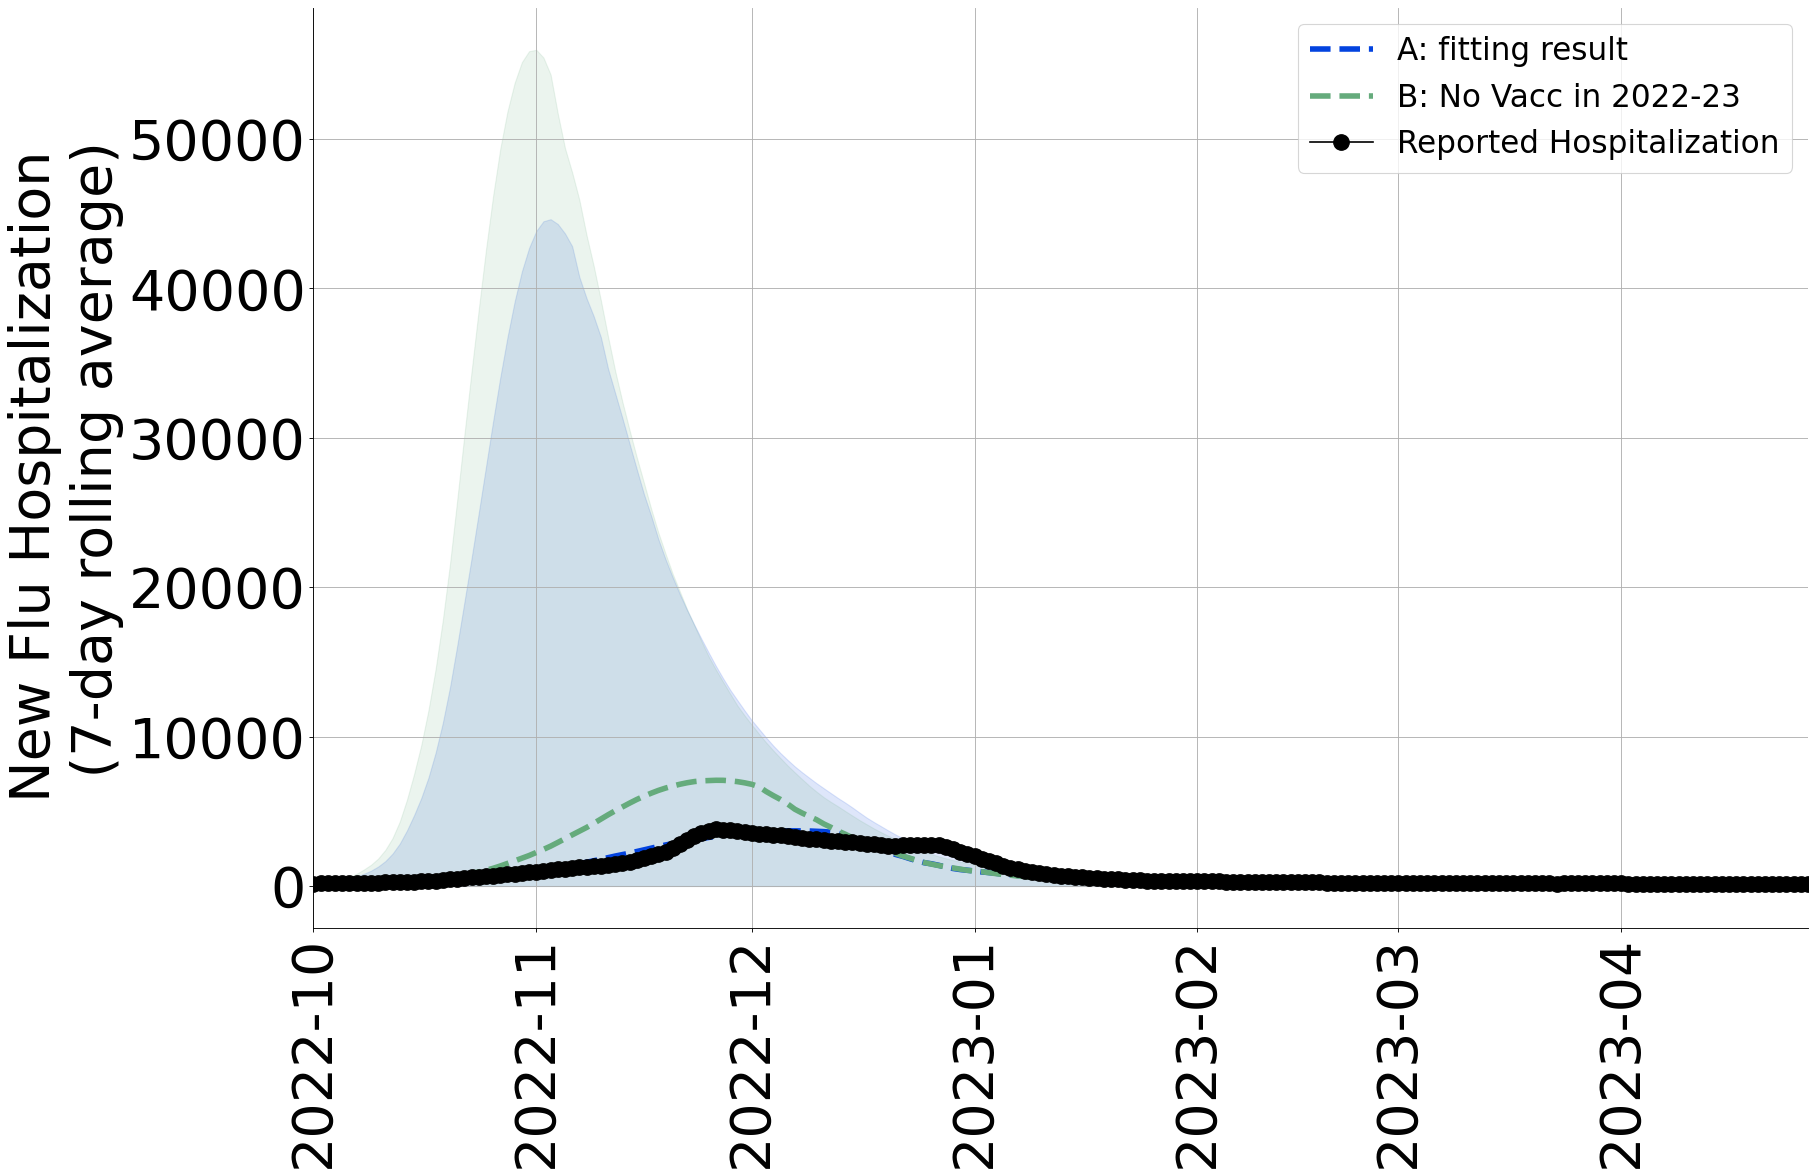

In [153]:
drange1 = pd.date_range("2022-10-01", periods=209, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=294, freq="1D")
drange3 = pd.date_range("2022-10-01", periods=209, freq="1D") 
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""

plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,22], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:blue', lw=5, label = 'A: fitting result')

plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,22], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'B: No Vacc in 2022-23')


'''
plt.fill_between(drange1, new_hosp_p_C[:,2], new_hosp_p_C[:,22], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[:,12], '--', color='xkcd:red', lw=5, label = 'C: VE against infection only')

plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark orange', alpha=0.13)
plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark orange', lw=5, label = 'D: VE against hosp only')
'''

plt.plot(drange3, hosp_avg2, 'k-o', markersize=14,label = 'Reported Hospitalization')

#plt.fill_between(drange1, new_hosp_p_T4[:,2], new_hosp_p_T4[:,21], color='xkcd:green', alpha=0.13)
#plt.plot(drange1, new_hosp_p_T4[:,12], '--', color='xkcd:dark green', lw=5, label = 'E: No vaccination in 2022-23 season')


plt.xticks(rotation=90)
#plt.title(state + ' Hospitalization') 
plt.ylabel('New Flu Hospitalization \n (7-day rolling average)')
plt.legend(fontsize=28);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' Hospitalizations.jpeg')

In [ ]:
drange1 = pd.date_range("2022-10-01", periods=209, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=294, freq="1D")
drange3 = pd.date_range("2022-10-01", periods=209, freq="1D") 
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""


plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,22], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'No Vaccination Model')


plt.fill_between(drange1, new_hosp_p_C[:,2], new_hosp_p_C[:,22], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[:,12], '--', color='xkcd:red', lw=5, label = 'Susceptibility-Only Vaccination Model')

#plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark orange', alpha=0.13)
#plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark orange', lw=5, label = 'VE Against Hospitalization Only')

plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,22], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:blue', lw=5, label = 'Baseline Model')

plt.plot(drange3, hosp_avg2, 'k-o', markersize=14,label = 'Reported Hospitalization')

#plt.fill_between(drange1, new_hosp_p_T4[:,2], new_hosp_p_T4[:,21], color='xkcd:green', alpha=0.13)
#plt.plot(drange1, new_hosp_p_T4[:,12], '--', color='xkcd:dark green', lw=5, label = 'E: No vaccination in 2022-23 season')


plt.xticks(rotation=90)
#plt.title(state + ' Hospitalization') 
plt.ylabel('Incident hospitalizations (7-day average)',fontsize=37)
plt.legend(fontsize=42);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' Hospitalizations.jpeg')
plt.savefig('dir_indir_all.jpeg')

In [ ]:
from matplotlib.ticker import FuncFormatter
drange1 = pd.date_range("2022-10-01", periods=209, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=294, freq="1D")
drange3 = pd.date_range("2022-10-01", periods=209, freq="1D") 
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""


plt.fill_between(drange1, np.cumsum(new_hosp_p_B[:,2])/1000, np.cumsum(new_hosp_p_B[:,22])/1000, color='xkcd:tea', alpha=0.13)
plt.plot(drange1, np.cumsum(new_hosp_p_B[:,12])/1000, '--', color='xkcd:tea', lw=5, label = 'No Vaccination Model')


plt.fill_between(drange1, np.cumsum(new_hosp_p_C[:,2])/1000, np.cumsum(new_hosp_p_C[:,22])/1000, color='xkcd:red', alpha=0.13)
plt.plot(drange1, np.cumsum(new_hosp_p_C[:,12])/1000, '--', color='xkcd:red', lw=5, label = 'Susceptibility-Only Vaccination Model')

#plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark orange', alpha=0.13)
#plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark orange', lw=5, label = 'VE Against Hospitalization Only')

plt.fill_between(drange1, np.cumsum(new_hosp_p_A[:,2])/1000, np.cumsum(new_hosp_p_A[:,22])/1000, color='xkcd:blue', alpha=0.13)
plt.plot(drange1, np.cumsum(new_hosp_p_A[:,12])/1000, '--', color='xkcd:blue', lw=5, label = 'Baseline Model')

plt.plot(drange3, np.cumsum(hosp_avg2)/1000, 'k-o', markersize=8,label = 'Reported Hospitalization')

#plt.fill_between(drange1, new_hosp_p_T4[:,2], new_hosp_p_T4[:,21], color='xkcd:green', alpha=0.13)
#plt.plot(drange1, new_hosp_p_T4[:,12], '--', color='xkcd:dark green', lw=5, label = 'E: No vaccination in 2022-23 season')


plt.xticks(rotation=90)
#plt.title(state + ' Hospitalization') 
plt.ylabel('Cumulative Weekly Hospitalizations (thousands)',fontsize=36)
#plt.legend(loc='upper left',fontsize=33)
#plt.legend(fontsize=30);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' Hospitalizations.jpeg')
plt.savefig('cumulativedir_indir_all.jpeg')

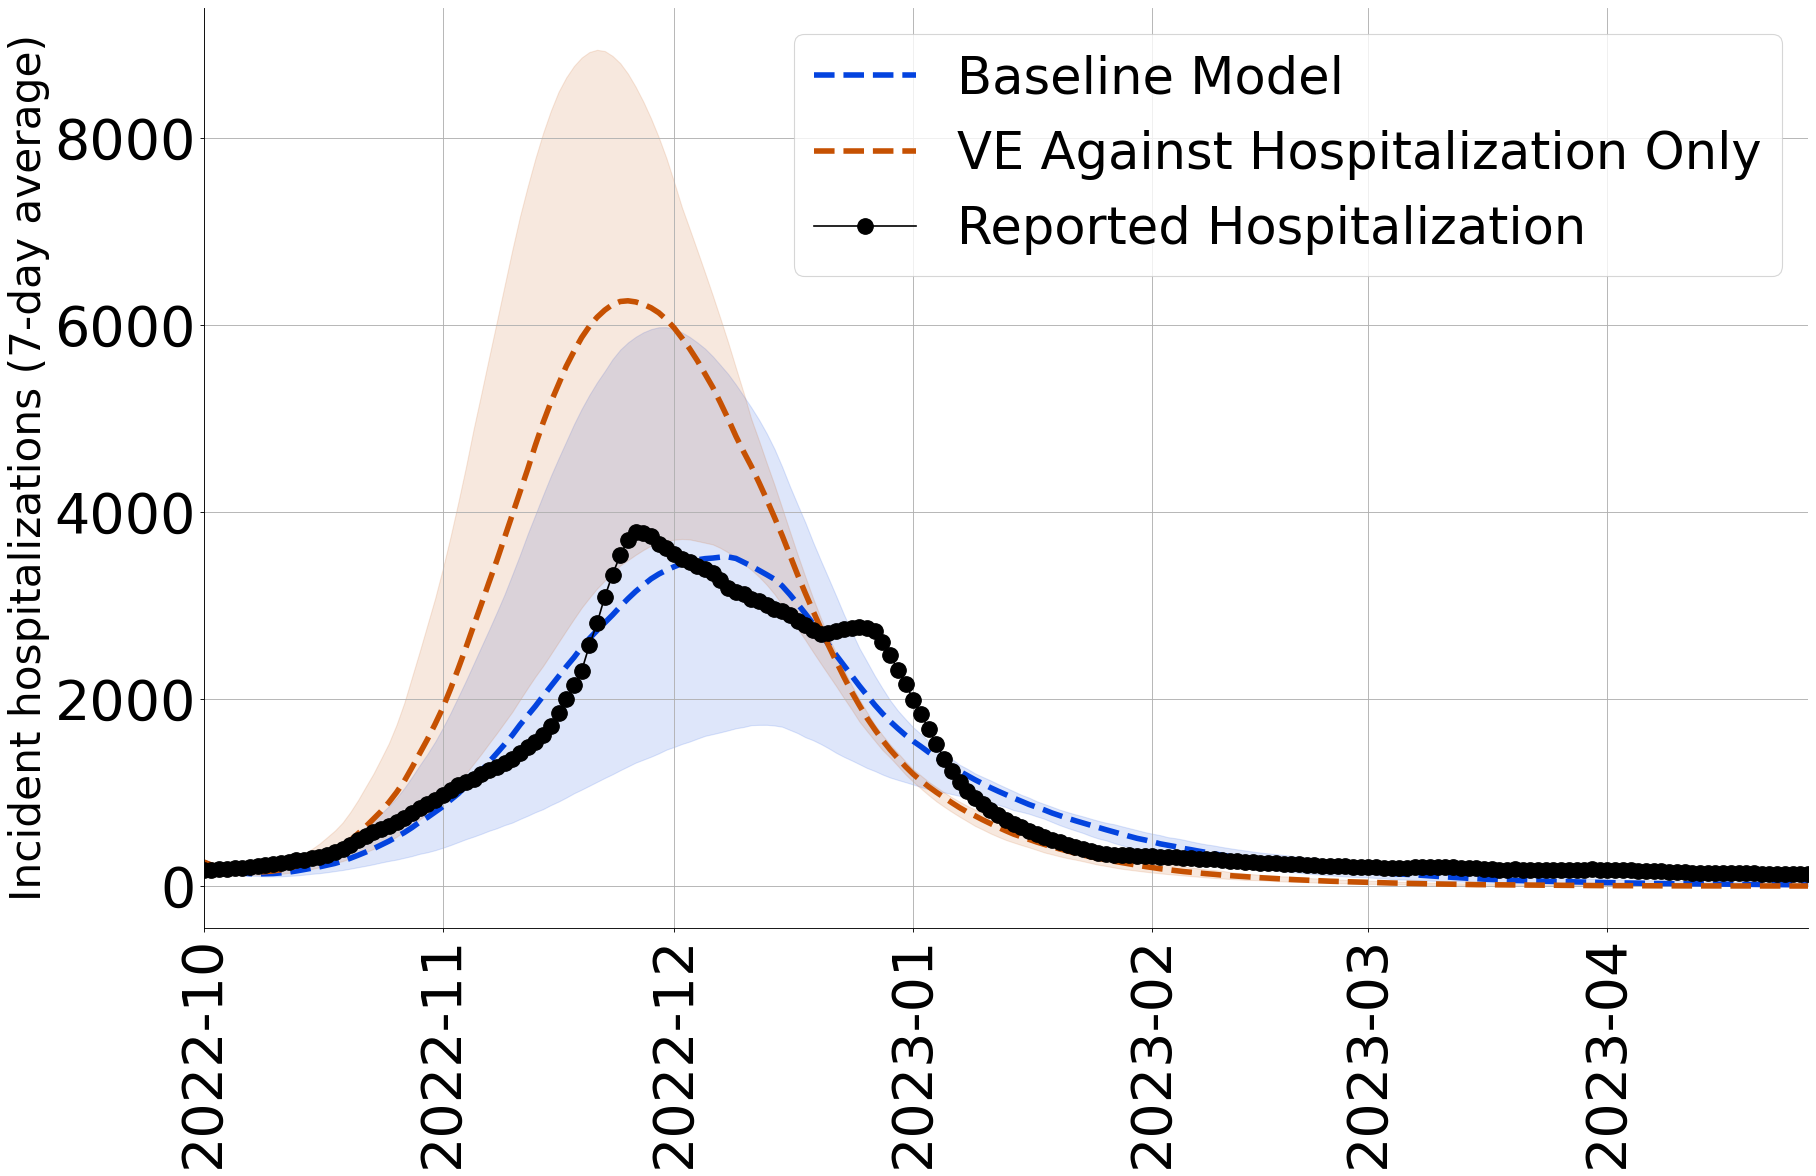

In [91]:
drange1 = pd.date_range("2022-10-01", periods=209, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=294, freq="1D")
drange3 = pd.date_range("2022-10-01", periods=209, freq="1D") 
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""

plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,22], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:blue', lw=5, label = 'Baseline Model')

#plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,22], color='xkcd:tea', alpha=0.13)
#plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'No Vaccination Model')


#plt.fill_between(drange1, new_hosp_p_C[:,2], new_hosp_p_C[:,22], color='xkcd:red', alpha=0.13)
#plt.plot(drange1, new_hosp_p_C[:,12], '--', color='xkcd:red', lw=5, label = 'VE Against Infection Only')

plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark orange', alpha=0.13)
plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark orange', lw=5, label = 'VE Against Hospitalization Only')


plt.plot(drange3, hosp_avg2, 'k-o', markersize=14,label = 'Reported Hospitalization')

#plt.fill_between(drange1, new_hosp_p_T4[:,2], new_hosp_p_T4[:,21], color='xkcd:green', alpha=0.13)
#plt.plot(drange1, new_hosp_p_T4[:,12], '--', color='xkcd:dark green', lw=5, label = 'E: No vaccination in 2022-23 season')


plt.xticks(rotation=90)
#plt.title(state + ' Hospitalization') 
plt.ylabel('Incident hospitalizations (7-day average)',fontsize=38)
plt.legend(fontsize=46);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' Hospitalizations.jpeg')
plt.savefig('indirectDirecti2.jpeg')

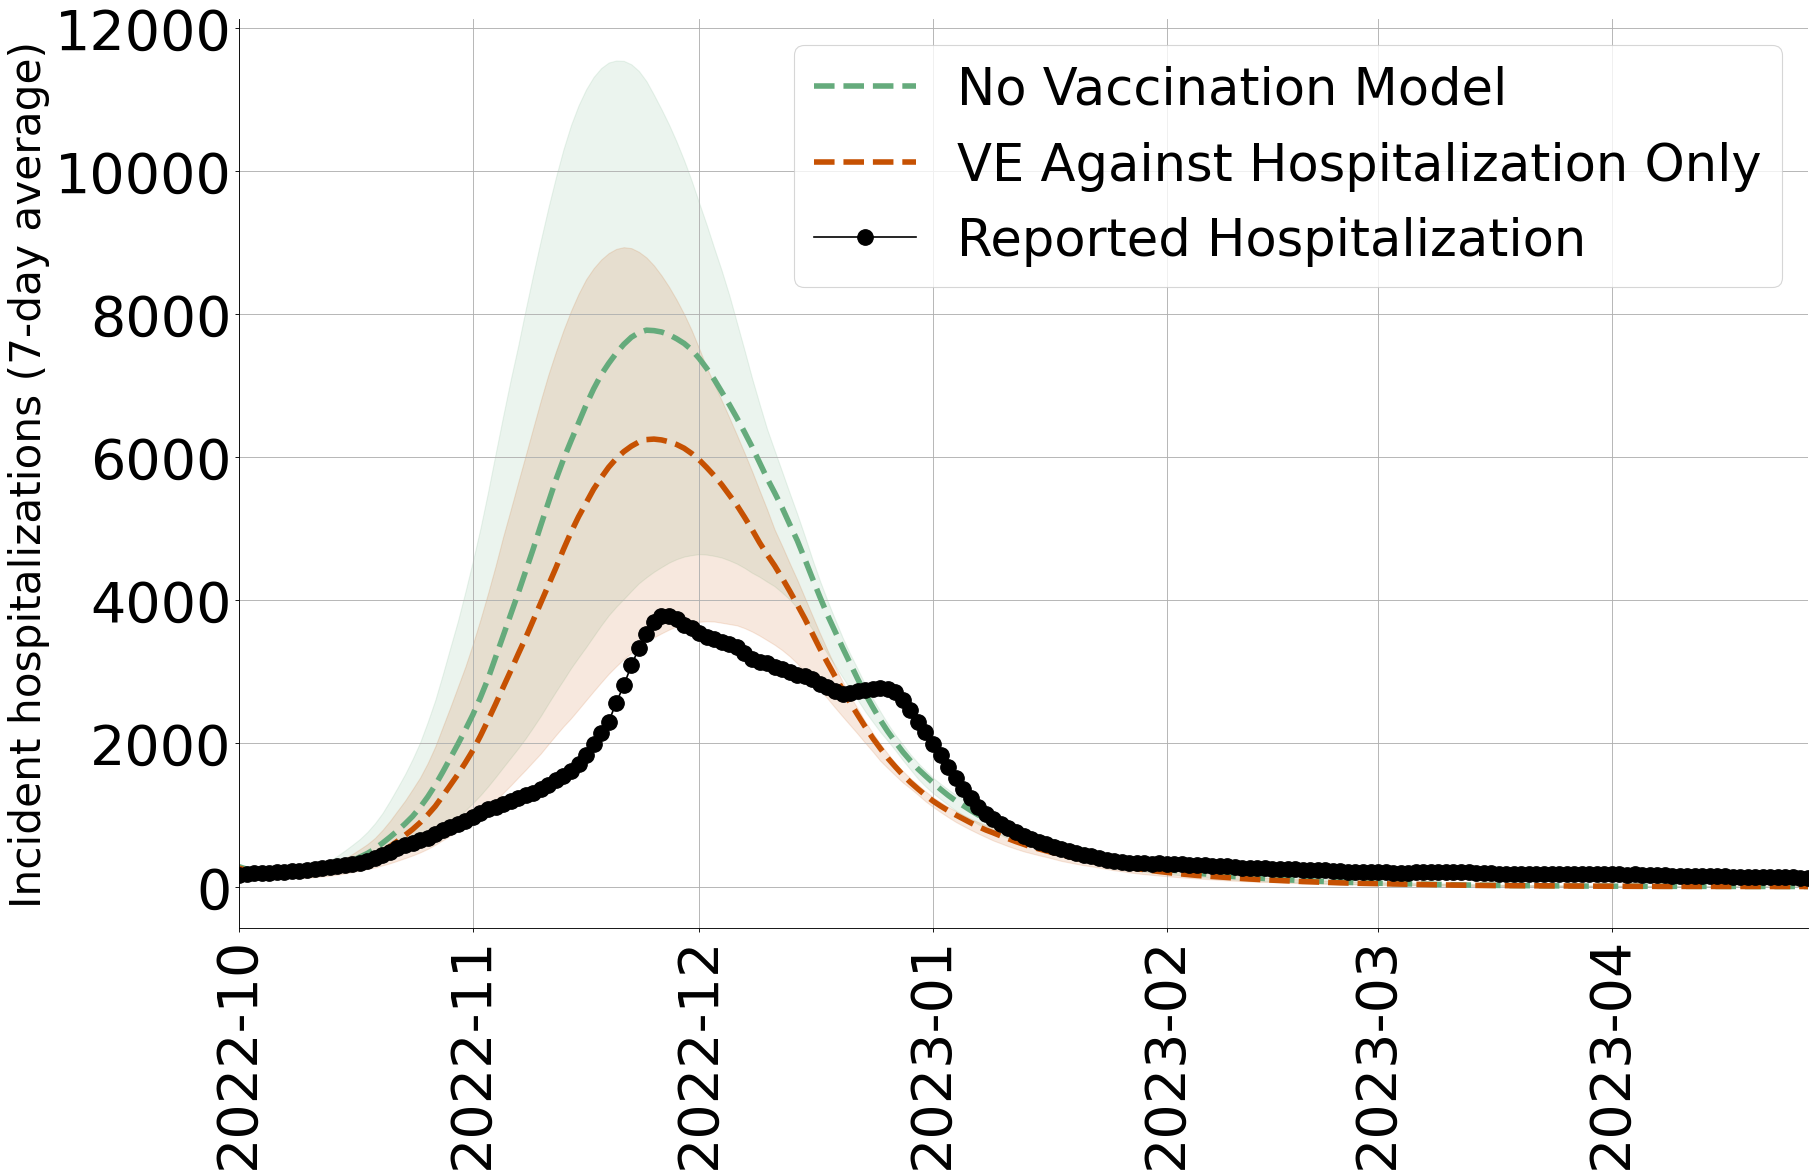

In [67]:
drange1 = pd.date_range("2022-10-01", periods=209, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=294, freq="1D")
drange3 = pd.date_range("2022-10-01", periods=209, freq="1D") 
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""

#plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,22], color='xkcd:blue', alpha=0.13)
#plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:blue', lw=5, label = 'Baseline Model')

plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,22], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'No Vaccination Model')


#plt.fill_between(drange1, new_hosp_p_C[:,2], new_hosp_p_C[:,22], color='xkcd:red', alpha=0.13)
#plt.plot(drange1, new_hosp_p_C[:,12], '--', color='xkcd:red', lw=5, label = 'VE against infection only')

plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark orange', alpha=0.13)
plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark orange', lw=5, label = 'VE Against Hospitalization Only')


plt.plot(drange3, hosp_avg2, 'k-o', markersize=14,label = 'Reported Hospitalization')

#plt.fill_between(drange1, new_hosp_p_T4[:,2], new_hosp_p_T4[:,21], color='xkcd:green', alpha=0.13)
#plt.plot(drange1, new_hosp_p_T4[:,12], '--', color='xkcd:dark green', lw=5, label = 'E: No vaccination in 2022-23 season')


plt.xticks(rotation=90)
#plt.title(state + ' Hospitalization') 
plt.ylabel('Incident hospitalizations (7-day average)',fontsize=38)
plt.legend(fontsize=46);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' Hospitalizations.jpeg')
plt.savefig('indirectDirecti4.jpeg')

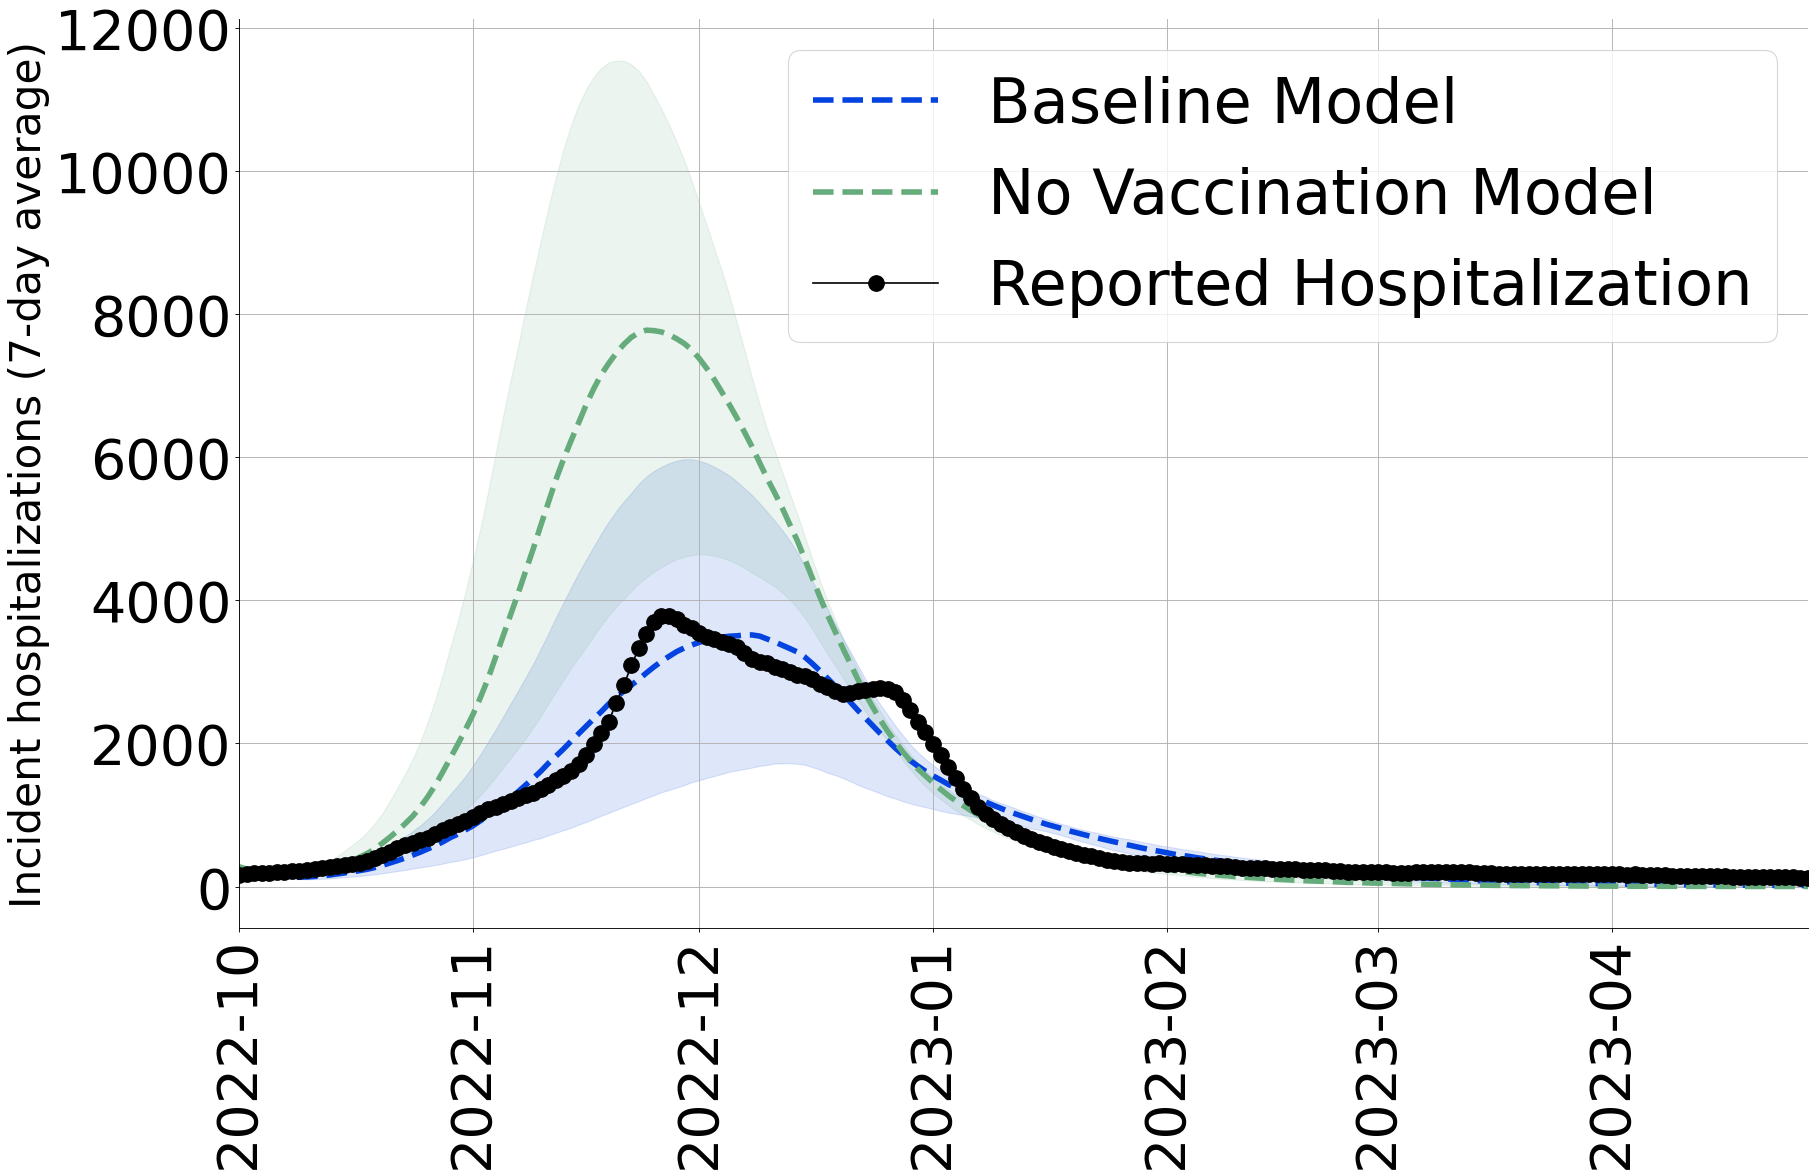

In [83]:
drange1 = pd.date_range("2022-10-01", periods=209, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=294, freq="1D")
drange3 = pd.date_range("2022-10-01", periods=209, freq="1D") 
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""

plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,22], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:blue', lw=5, label = 'Baseline Model')

plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,22], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'No Vaccination Model')


#plt.fill_between(drange1, new_hosp_p_C[:,2], new_hosp_p_C[:,22], color='xkcd:red', alpha=0.13)
#plt.plot(drange1, new_hosp_p_C[:,12], '--', color='xkcd:red', lw=5, label = 'C: VE against infection only')

#plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark orange', alpha=0.13)
#plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark orange', lw=5, label = 'D: VE against hosp only')


plt.plot(drange3, hosp_avg2, 'k-o', markersize=14,label = 'Reported Hospitalization')

#plt.fill_between(drange1, new_hosp_p_T4[:,2], new_hosp_p_T4[:,21], color='xkcd:green', alpha=0.13)
#plt.plot(drange1, new_hosp_p_T4[:,12], '--', color='xkcd:dark green', lw=5, label = 'E: No vaccination in 2022-23 season')


plt.xticks(rotation=90)
#plt.title(state + ' Hospitalization') 
plt.ylabel('Incident hospitalizations (7-day average)',fontsize=38)
plt.legend(fontsize=56);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' Hospitalizations.jpeg')
plt.savefig('Hospitalizations_baseline_normal.jpeg')

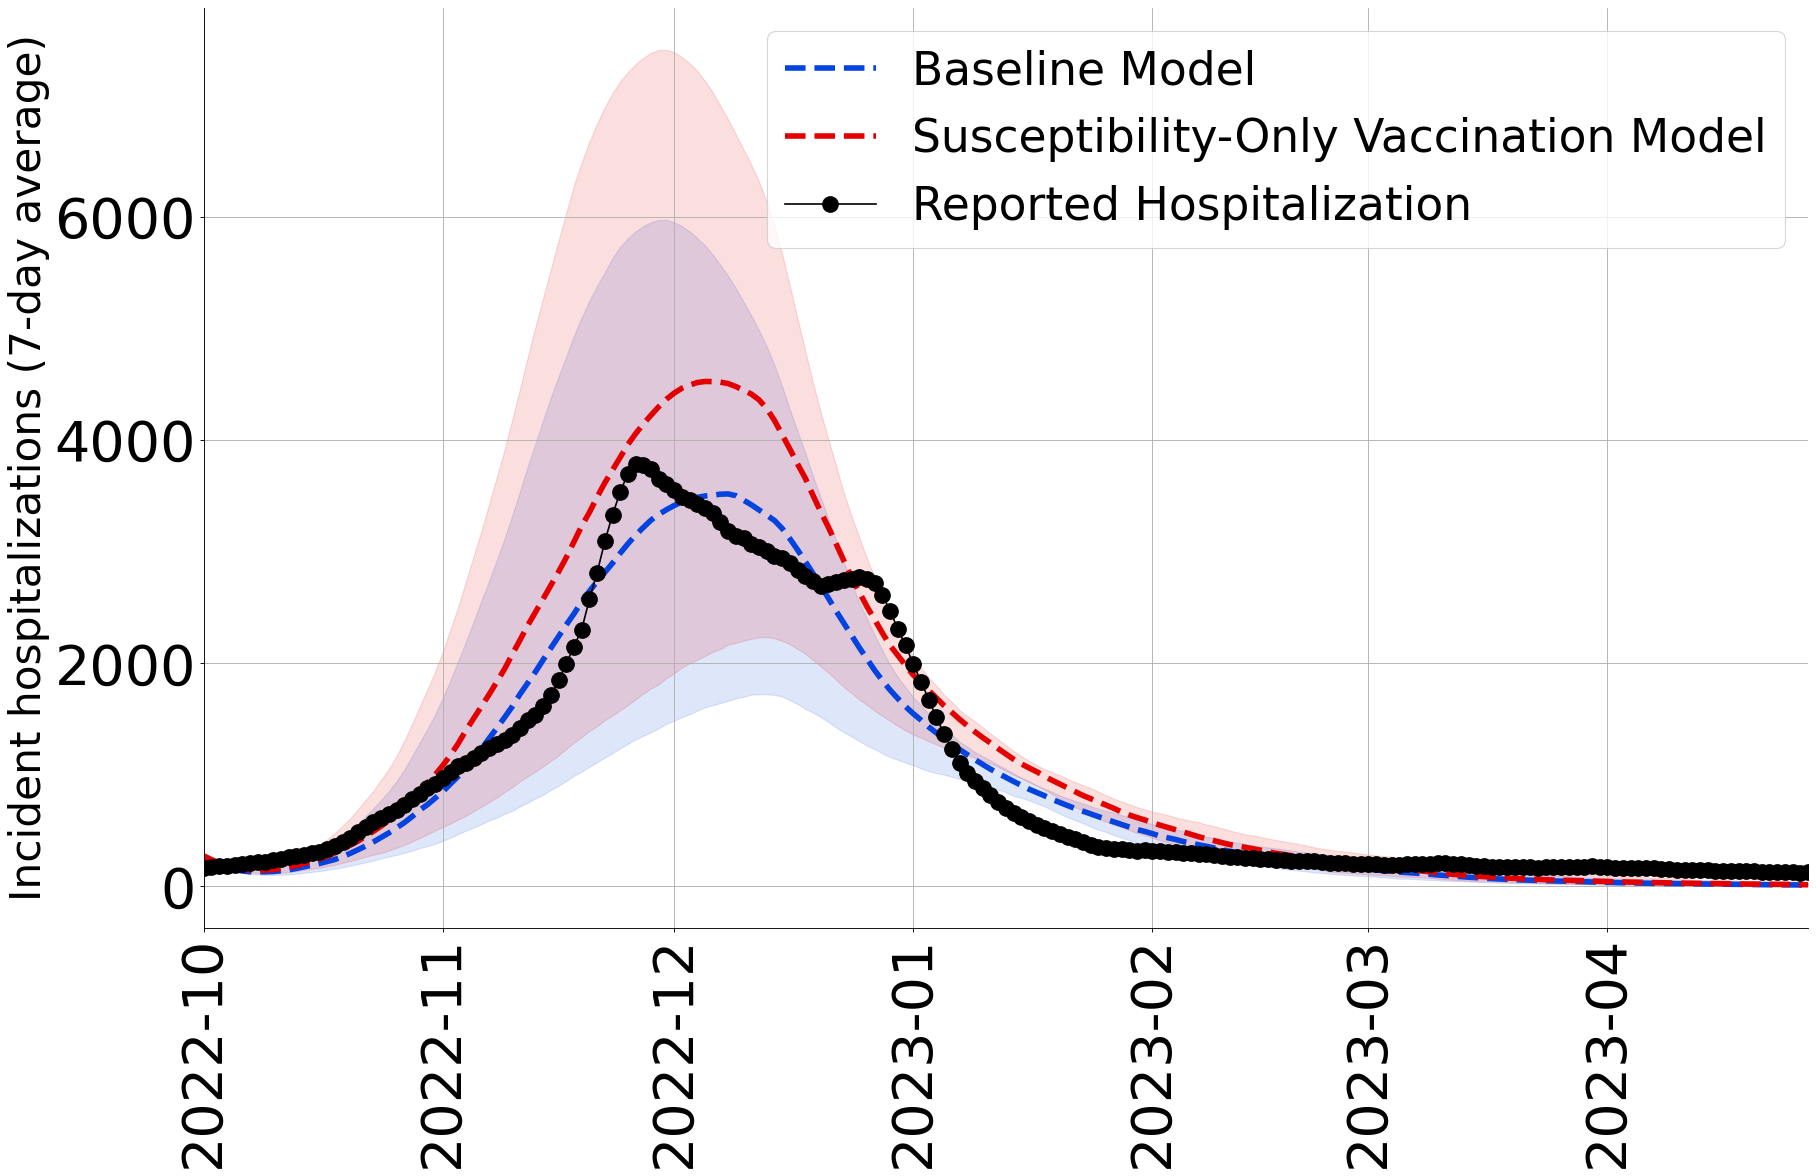

In [127]:
drange1 = pd.date_range("2022-10-01", periods=209, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=294, freq="1D")
drange3 = pd.date_range("2022-10-01", periods=209, freq="1D") 
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""

plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,22], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:blue', lw=5, label = 'Baseline Model')

#plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,22], color='xkcd:tea', alpha=0.13)
#plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'No Vaccination Model')


plt.fill_between(drange1, new_hosp_p_C[:,2], new_hosp_p_C[:,22], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[:,12], '--', color='xkcd:red', lw=5, label = 'Susceptibility-Only Vaccination Model')

#plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark orange', alpha=0.13)
#plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark orange', lw=5, label = 'D: VE against hosp only')


plt.plot(drange3, hosp_avg2, 'k-o', markersize=14,label = 'Reported Hospitalization')

#plt.fill_between(drange1, new_hosp_p_T4[:,2], new_hosp_p_T4[:,21], color='xkcd:green', alpha=0.13)
#plt.plot(drange1, new_hosp_p_T4[:,12], '--', color='xkcd:dark green', lw=5, label = 'E: No vaccination in 2022-23 season')


plt.xticks(rotation=90)
#plt.title(state + ' Hospitalization') 
plt.ylabel('Incident hospitalizations (7-day average)',fontsize=38)
plt.legend(loc='upper right', fontsize=41);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' Hospitalizations.jpeg')
plt.savefig('Directi1.jpeg')

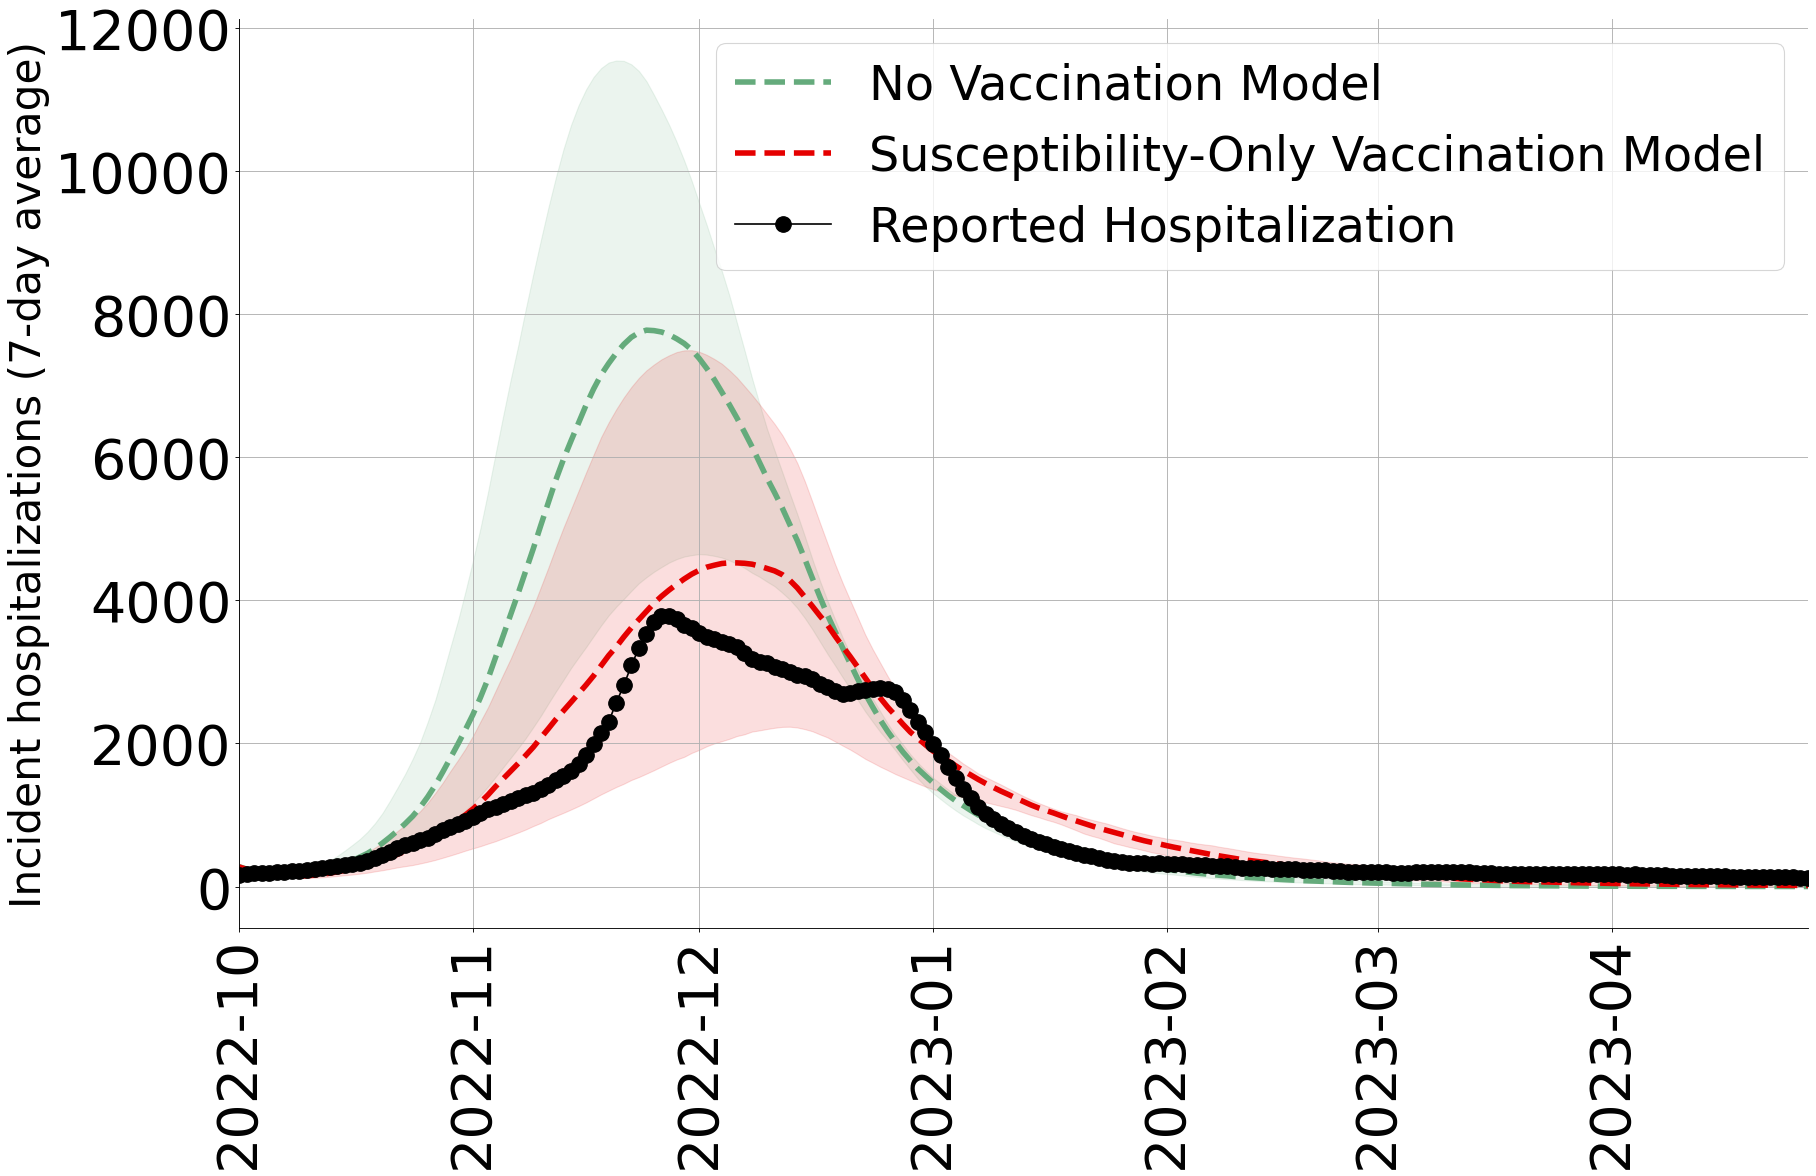

In [131]:
drange1 = pd.date_range("2022-10-01", periods=209, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=294, freq="1D")
drange3 = pd.date_range("2022-10-01", periods=209, freq="1D") 
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""

#plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,22], color='xkcd:blue', alpha=0.13)
#plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:blue', lw=5, label = 'Baseline Model')

plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,22], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'No Vaccination Model')


plt.fill_between(drange1, new_hosp_p_C[:,2], new_hosp_p_C[:,22], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[:,12], '--', color='xkcd:red', lw=5, label = 'Susceptibility-Only Vaccination Model')

#plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark orange', alpha=0.13)
#plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark orange', lw=5, label = 'D: VE against hosp only')


plt.plot(drange3, hosp_avg2, 'k-o', markersize=14,label = 'Reported Hospitalization')

#plt.fill_between(drange1, new_hosp_p_T4[:,2], new_hosp_p_T4[:,21], color='xkcd:green', alpha=0.13)
#plt.plot(drange1, new_hosp_p_T4[:,12], '--', color='xkcd:dark green', lw=5, label = 'E: No vaccination in 2022-23 season')


plt.xticks(rotation=90)
#plt.title(state + ' Hospitalization') 
plt.ylabel('Incident hospitalizations (7-day average)',fontsize=38)
plt.legend(fontsize=43);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' Hospitalizations.jpeg')
plt.savefig('IndirectDirecti1.jpeg')

In [115]:
import datetime


def calcul_peak_date(case):
    LEN=len(case)
    peaks = np.zeros([25,])
    peak_d = np.zeros([25,])
    
    my_date = datetime.datetime(2022, 8, 8, 0, 0, 0) 

    date_s = np.zeros([25,])
    for j in range(25):
        for i in range(0,LEN):
            peaks[j] = np.max(case[0:LEN,j])

            if (case[i,j] >= peaks[j]):
                peak_d[j] = i


            
    #my_date_l = my_date + datetime.timedelta(days = i)
    #my_date_l = my_date_l.strftime('%m/%d')

    peak_d_p = np.percentile(peak_d, [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
    print(peak_d_p[12])
    my_date_50 = my_date + datetime.timedelta(days = peak_d_p[12])
    my_date_50 = my_date_50.strftime('%m/%d')
    
    my_date_5 = my_date + datetime.timedelta(days = peak_d_p[2])
    my_date_5 = my_date_5.strftime('%m/%d')  
    
    my_date_95 = my_date + datetime.timedelta(days = peak_d_p[21])
    my_date_95 = my_date_95.strftime('%m/%d')      
    
    print(str((my_date_50)) + " [" + str((my_date_5)) + ", " + str((my_date_95)) + "]")


In [268]:
import datetime


def calcul_peak(case):
    LEN=len(case)

    peak_I_d_h = 0
    
    my_date = datetime.datetime(2022, 8, 8, 0, 0, 0) 
 
    my_date_h = datetime.datetime(2022, 8, 8, 0, 0, 0) 


    peak_I_l = np.max(case[0:LEN,2])
    peak_I_m = np.max(case[0:LEN,12])
    peak_I_h = np.max(case[0:LEN,21])
    
    for i in range(0,LEN):
        if (case[i,2] >= peak_I_l):
            peak_I_d_l = i
            my_date_l = my_date + datetime.timedelta(days = i)
            my_date_l = my_date_l.strftime('%m/%d')
        
        if (case[i,12] >= peak_I_m):
            peak_I_d_m = i
            my_date_m = my_date + datetime.timedelta(days = i)
            my_date_m = my_date_m.strftime('%m/%d')
            
        if (case[i,21] >= peak_I_h):
            peak_I_d_h = i
            my_date_h = my_date + datetime.timedelta(days = i)
            my_date_h = my_date_h.strftime('%m/%d')
            
    
    print(str(round(peak_I_m)) + " [" + str(round(peak_I_l)) + ", " + str(round(peak_I_h)) + "]")
    print(str((my_date_m)) + " [" + str((my_date_l)) + ", " + str((my_date_h)) + "]")

In [269]:
calcul_peak_date(new_hosp_p_A)
calcul_peak_date(new_hosp_p_B)
calcul_peak_date(new_hosp_p_C)
calcul_peak_date(new_hosp_p_D)


66.0
10/13 [09/27, 10/22]
53.0
09/30 [09/19, 10/11]
66.0
10/13 [09/27, 10/20]
53.0
09/30 [09/20, 10/14]


In [270]:
calcul_peak(new_hosp_p_A)
calcul_peak(new_hosp_p_B)
calcul_peak(new_hosp_p_C)
calcul_peak(new_hosp_p_D)
aaa=np.max(H_ov_avg)
for i in range(0,len(H_ov_avg)):
    if (H_ov_avg[i] >= aaa):
        print(i)

3518 [890, 7288]
10/14 [10/21, 10/04]
7096 [2687, 12846]
09/30 [10/11, 09/23]
4297 [1077, 8873]
10/13 [10/20, 10/02]
5793 [2133, 10460]
09/30 [10/14, 09/23]
63


In [271]:
np.sum(hosp_avg2)

209972.42857142858

In [272]:
def calcul_cum(case):


    peak_I_l = np.sum(case[0:263,2])
    peak_I_m = np.sum(case[0:263,12])
    peak_I_h = np.sum(case[0:263,21])
    

    
    print(str(round(peak_I_m)) + " [" + str(round(peak_I_l)) + ", " + str(round(peak_I_h)) + "]")

In [273]:
calcul_cum(new_hosp_p_A)
calcul_cum(new_hosp_p_B)
calcul_cum(new_hosp_p_C)
calcul_cum(new_hosp_p_D)


211557 [68488, 387971]
347310 [151216, 559311]
259169 [85008, 472233]
284666 [121995, 461944]
